### Import Packages 

In [1]:
# Linear algebra 

import numpy as np 

# Data processing 
import pandas as pd 

# import XGB estimator 
from xgboost.sklearn import XGBRegressor 
import xgboost
# Metrics for root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
from tqdm import tqdm

In [2]:
# ! pip install xgboost --user 
# ! pip install sklearn --user

In [3]:
train= pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 25 columns):
key                                   1601458 non-null int64
apartment_id                          1601458 non-null int64
city                                  1601458 non-null int64
transaction_year_month                1601458 non-null int64
transaction_date                      1601458 non-null object
year_of_completion                    1601458 non-null int64
exclusive_use_area                    1601458 non-null float64
floor                                 1601458 non-null int64
latitude                              1601458 non-null float64
longitude                             1601458 non-null float64
address_by_law                        1601458 non-null int64
total_parking_capacity_in_site        1509645 non-null float64
total_household_count_in_sites        1601458 non-null int64
apartment_building_count_in_sites     1601458 non-null int64
tallest_building_in_site

In [5]:
train.head()
for col in train.columns:
    print('{}\n'.format(train[col].head())) 

0    0
1    1
2    2
3    3
4    4
Name: key, dtype: int64

0    5584
1    5584
2    5059
3    2816
4    2816
Name: apartment_id, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: city, dtype: int64

0    200601
1    200601
2    200601
3    200601
4    200601
Name: transaction_year_month, dtype: int64

0    11~20
1    11~20
2    11~20
3    11~20
4    11~20
Name: transaction_date, dtype: object

0    1999
1    1999
2    1992
3    1993
4    1993
Name: year_of_completion, dtype: int64

0     47.43
1     44.37
2     54.70
3     64.66
4    106.62
Name: exclusive_use_area, dtype: float64

0     6
1     8
2     8
3    11
4     7
Name: floor, dtype: int64

0    37.585965
1    37.585965
2    37.580511
3    37.580324
4    37.580324
Name: latitude, dtype: float64

0    127.000231
1    127.000231
2    127.014016
3    127.011788
4    127.011788
Name: longitude, dtype: float64

0    1111017100
1    1111017100
2    1111017400
3    1111017400
4    1111017400
Name: address_by_law, dtype: int64

0 

In [6]:
num_cols = [col for col in train.columns if train[col].dtypes in ['int64','float64']]
train[num_cols].describe()

,key,apartment_id,city,transaction_year_month,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,...,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
count,1.601458e+06,1.601458e+06,1.601458e+06,1.601458e+06,1.601458e+06,1.601458e+06,1.601458e+06,1.601458e+06,1.601458e+06,1.601458e+06,...,1.601458e+06,1.601458e+06,1.601449e+06,1.601449e+06,1.601458e+06,1.601458e+06,1.601458e+06,1.600767e+06,1.600767e+06,1.601458e+06
mean,8.007597e+05,7.781149e+03,6.252877e-01,2.012416e+05,1.998645e+03,7.946863e+01,1.013031e+01,3.666195e+01,1.277745e+02,1.704232e+09,...,1.181628e+03,1.274730e+01,2.077357e+01,1.393617e+01,3.481310e+04,1.020035e+02,2.931756e+02,2.951266e+00,1.587173e+00,4.021752e+08
std,4.623505e+05,7.384526e+03,4.840487e-01,3.775998e+02,8.444635e+00,2.800054e+01,7.194129e+00,1.157632e+00,1.005557e+00,7.216393e+08,...,1.128092e+03,1.399157e+01,8.750388e+00,6.785973e+00,4.157775e+04,3.306049e+01,3.237872e+02,6.653449e-01,5.071750e-01,3.223861e+08
min,0.000000e+00,3.000000e+00,0.000000e+00,2.006010e+05,1.962000e+03,1.639600e+01,-4.000000e+00,3.504879e+01,1.268061e+02,1.111012e+09,...,9.900000e+01,1.000000e+00,5.000000e+00,1.000000e+00,1.300000e+01,2.010000e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+06
25%,4.003642e+05,1.606000e+03,0.000000e+00,2.009070e+05,1.993000e+03,5.984000e+01,5.000000e+00,3.518907e+01,1.269782e+02,1.135011e+09,...,4.160000e+02,4.000000e+00,1.500000e+01,9.000000e+00,6.610000e+03,7.993000e+01,9.000000e+01,3.000000e+00,1.000000e+00,1.990000e+08
50%,8.007305e+05,5.579000e+03,1.000000e+00,2.013080e+05,1.999000e+03,8.446000e+01,9.000000e+00,3.749926e+01,1.270743e+02,1.165011e+09,...,8.110000e+02,9.000000e+00,2.000000e+01,1.300000e+01,2.048400e+04,1.029600e+02,1.940000e+02,3.000000e+00,2.000000e+00,3.240000e+08
75%,1.201101e+06,1.106300e+04,1.000000e+00,2.016030e+05,2.005000e+03,8.498000e+01,1.400000e+01,3.756554e+01,1.290298e+02,2.632010e+09,...,1.590000e+03,1.600000e+01,2.500000e+01,1.700000e+01,4.221900e+04,1.115400e+02,3.840000e+02,3.000000e+00,2.000000e+00,5.000000e+08
max,1.605373e+06,5.026400e+04,1.000000e+00,2.018100e+05,2.018000e+03,2.954340e+02,8.000000e+01,3.768763e+01,1.292376e+02,2.671033e+09,...,6.864000e+03,1.240000e+02,8.000000e+01,7.000000e+01,1.922520e+05,4.234000e+02,2.960000e+03,8.000000e+00,5.000000e+00,8.200000e+09


In [7]:
cat_cols = [col for col in train.columns if train[col].dtype in ['O']]
train[cat_cols].describe()

# 11~20일이 전체의 30%, heat_type은 개별난방이, 난방연료는 가스식, 문 구조는 계단식 
# 거래일의 경우는 수치형으로 변환해야.

,transaction_date,heat_type,heat_fuel,front_door_structure
count,1601458,1599441,1591791,1587566
unique,6,3,3,4
top,11~20,individual,gas,stairway
freq,538876,1085870,1204679,1146251


In [8]:
# 범주형 변수의 고유값을 직접 출력 
for col in cat_cols:
    uniq = np.unique(train[col].astype(str))
    print('-'* 50)
    print('# col:{}, n_uniq{}, uniq{}'.format(col, len(uniq),uniq)) 
    
# 거래일자는 10일까지 초순, 중순, 말로 나누는 게 좋겠다
# 난방 타입에는 결측치가 존재한다. 
# 난방 연료에는 결측치 뿐만 아니라 이상치도 존재한다. 
# door_structure에도 또한 이상치와 결측치가 같이 존재한다. 

--------------------------------------------------
# col:transaction_date, n_uniq6, uniq['11~20' '1~10' '21~28' '21~29' '21~30' '21~31']
--------------------------------------------------
# col:heat_type, n_uniq4, uniq['central' 'district' 'individual' 'nan']
--------------------------------------------------
# col:heat_fuel, n_uniq4, uniq['-' 'cogeneration' 'gas' 'nan']
--------------------------------------------------
# col:front_door_structure, n_uniq5, uniq['-' 'corridor' 'mixed' 'nan' 'stairway']


### Visualization 

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

--------------------------------------------------
col :  city


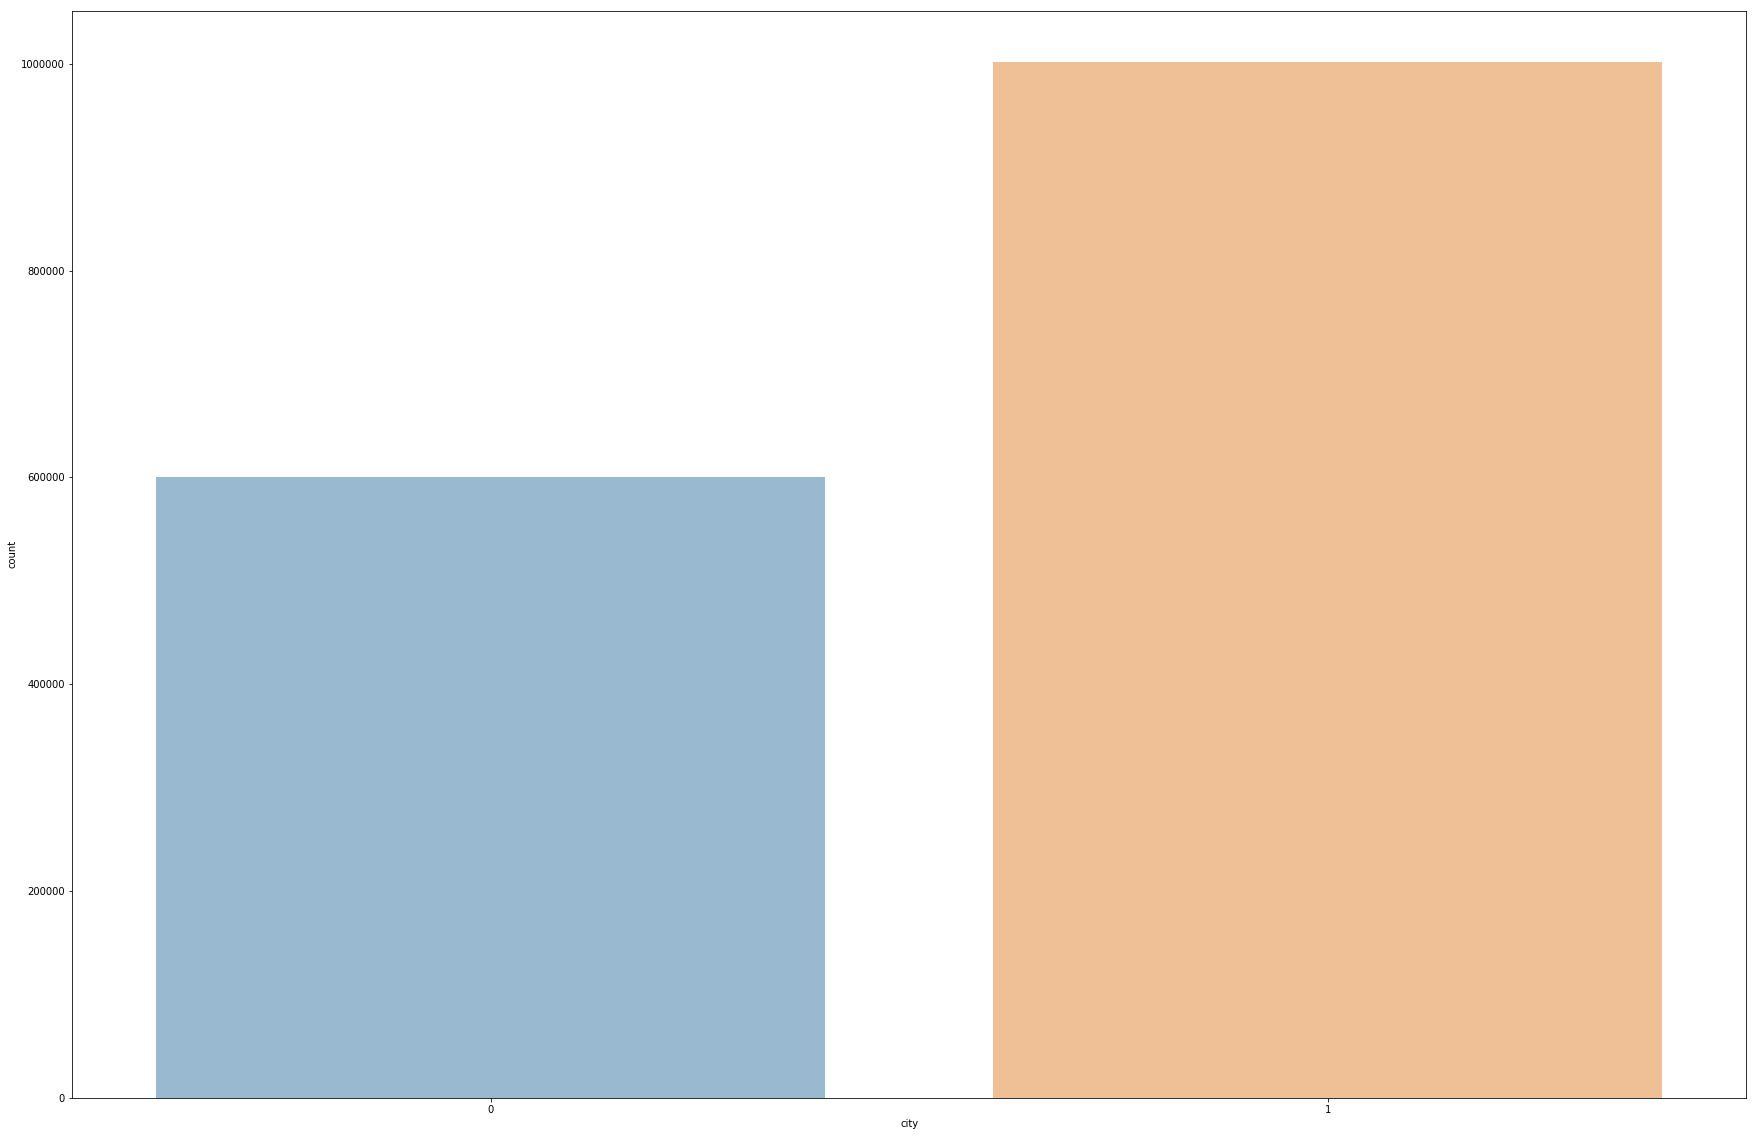

--------------------------------------------------
col :  transaction_year_month


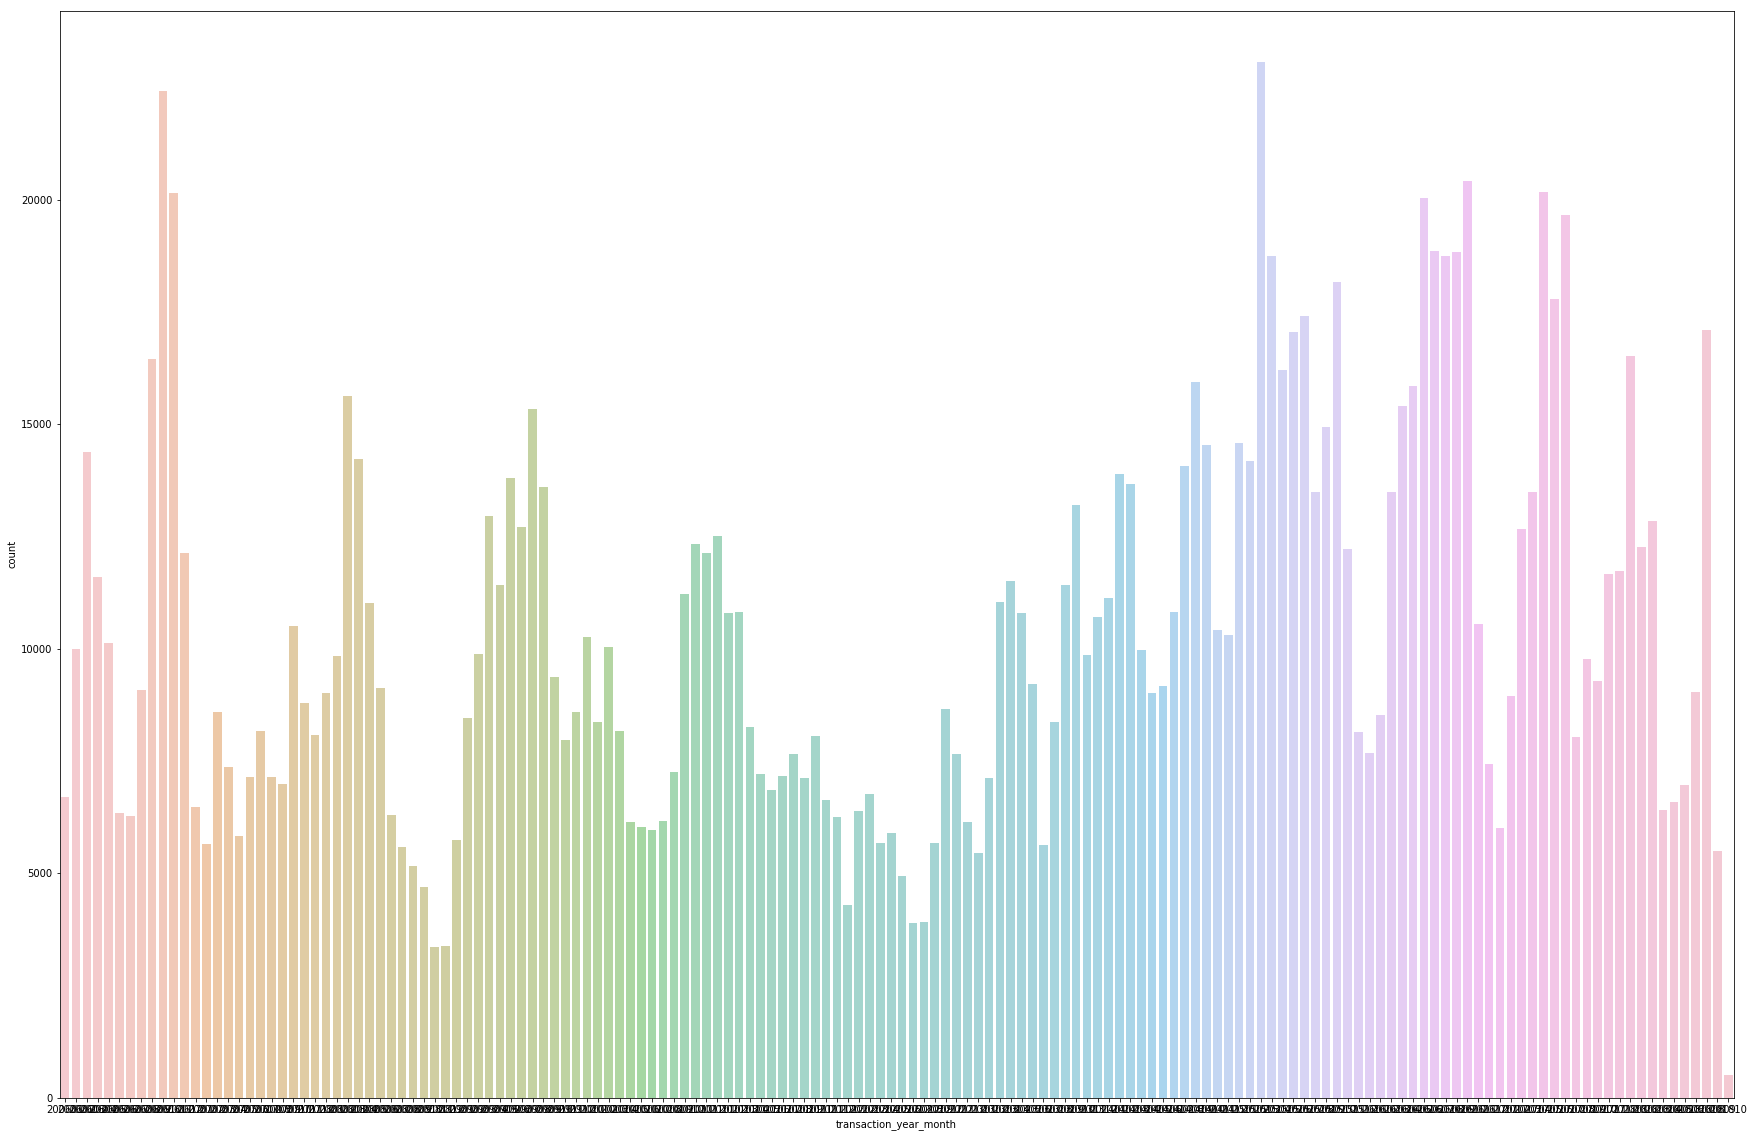

--------------------------------------------------
col :  transaction_date


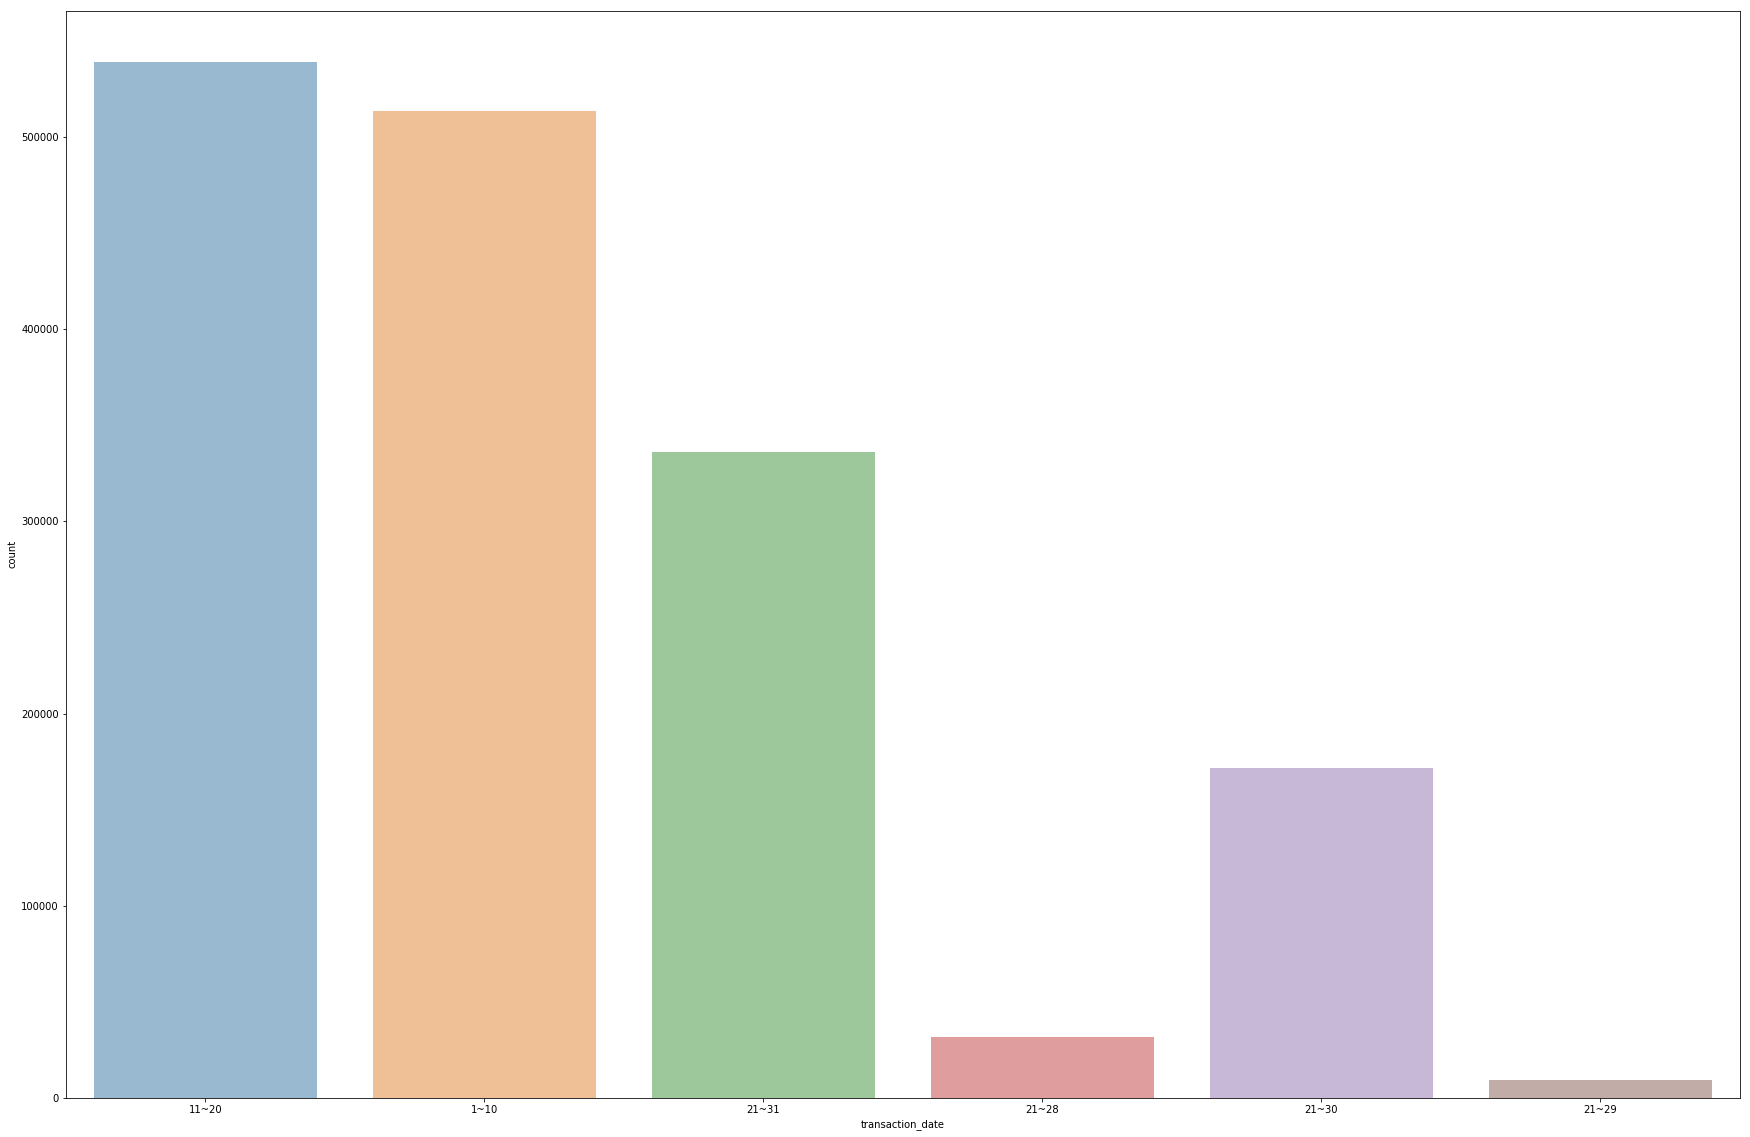

--------------------------------------------------
col :  year_of_completion


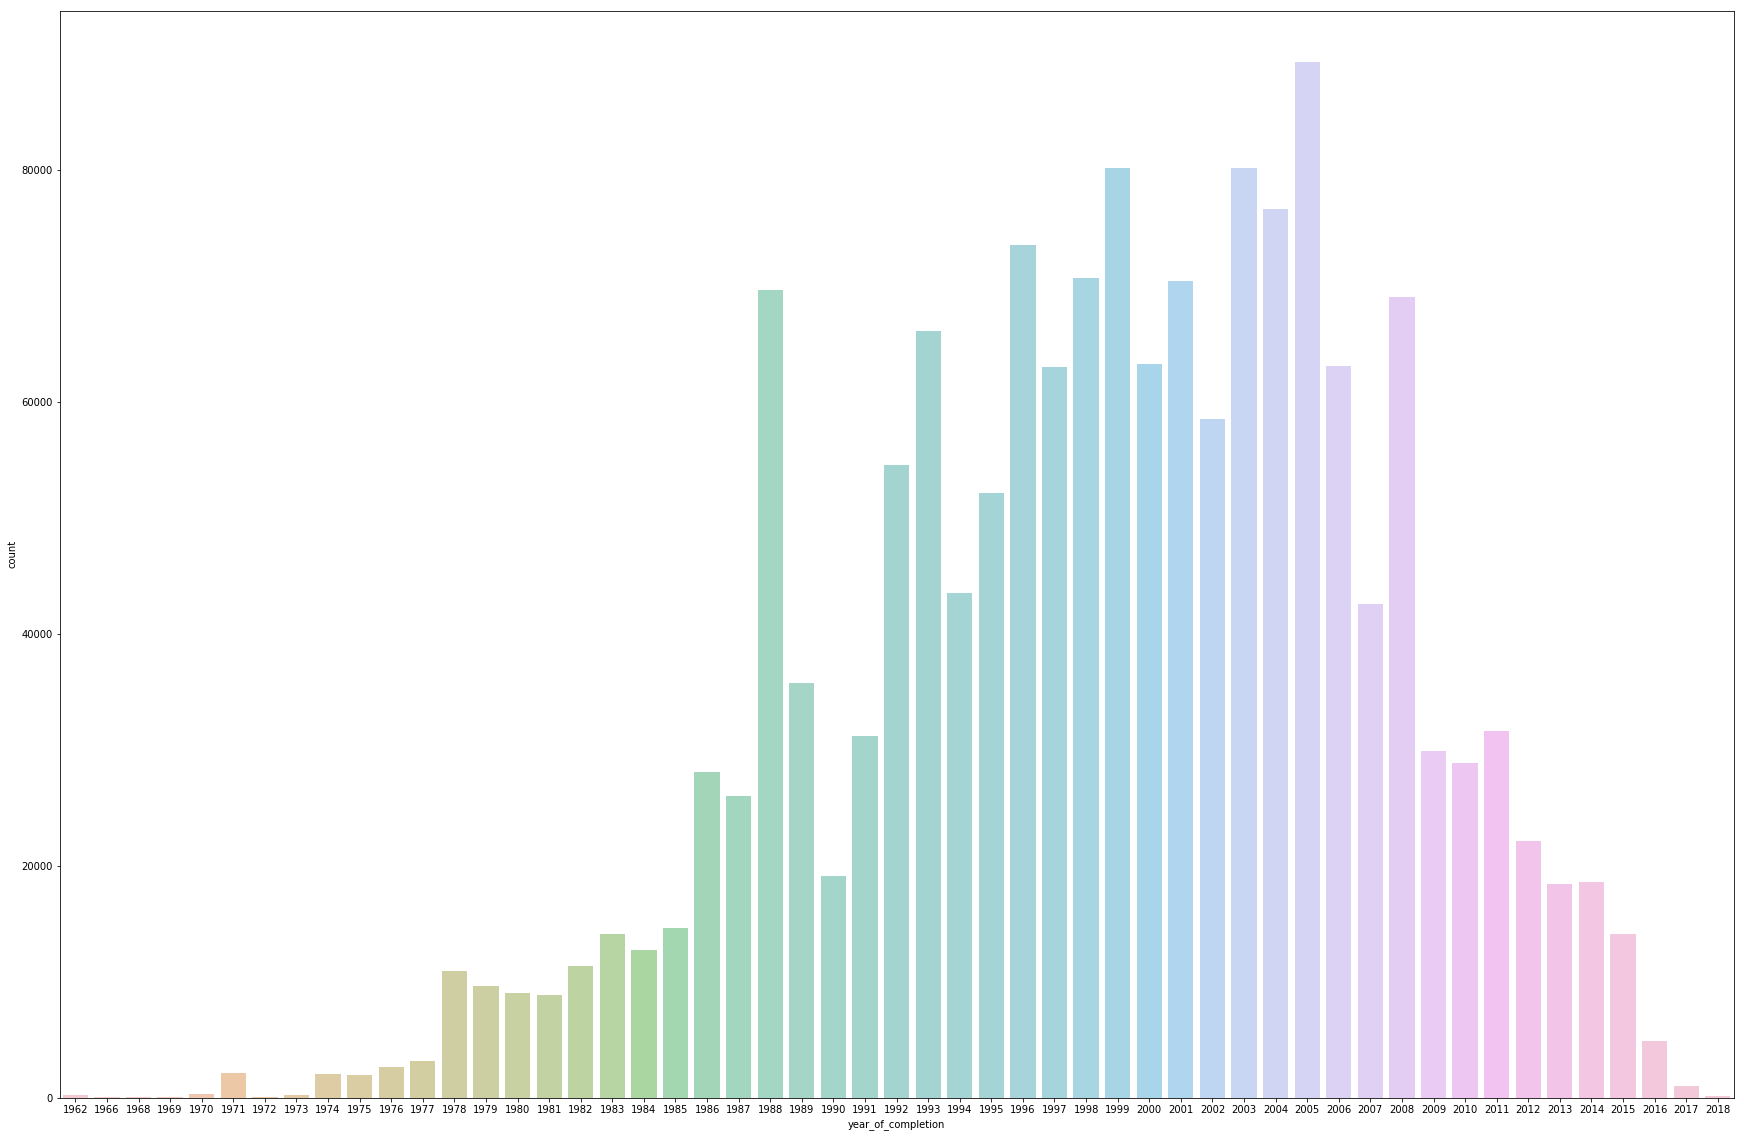

--------------------------------------------------
col :  floor


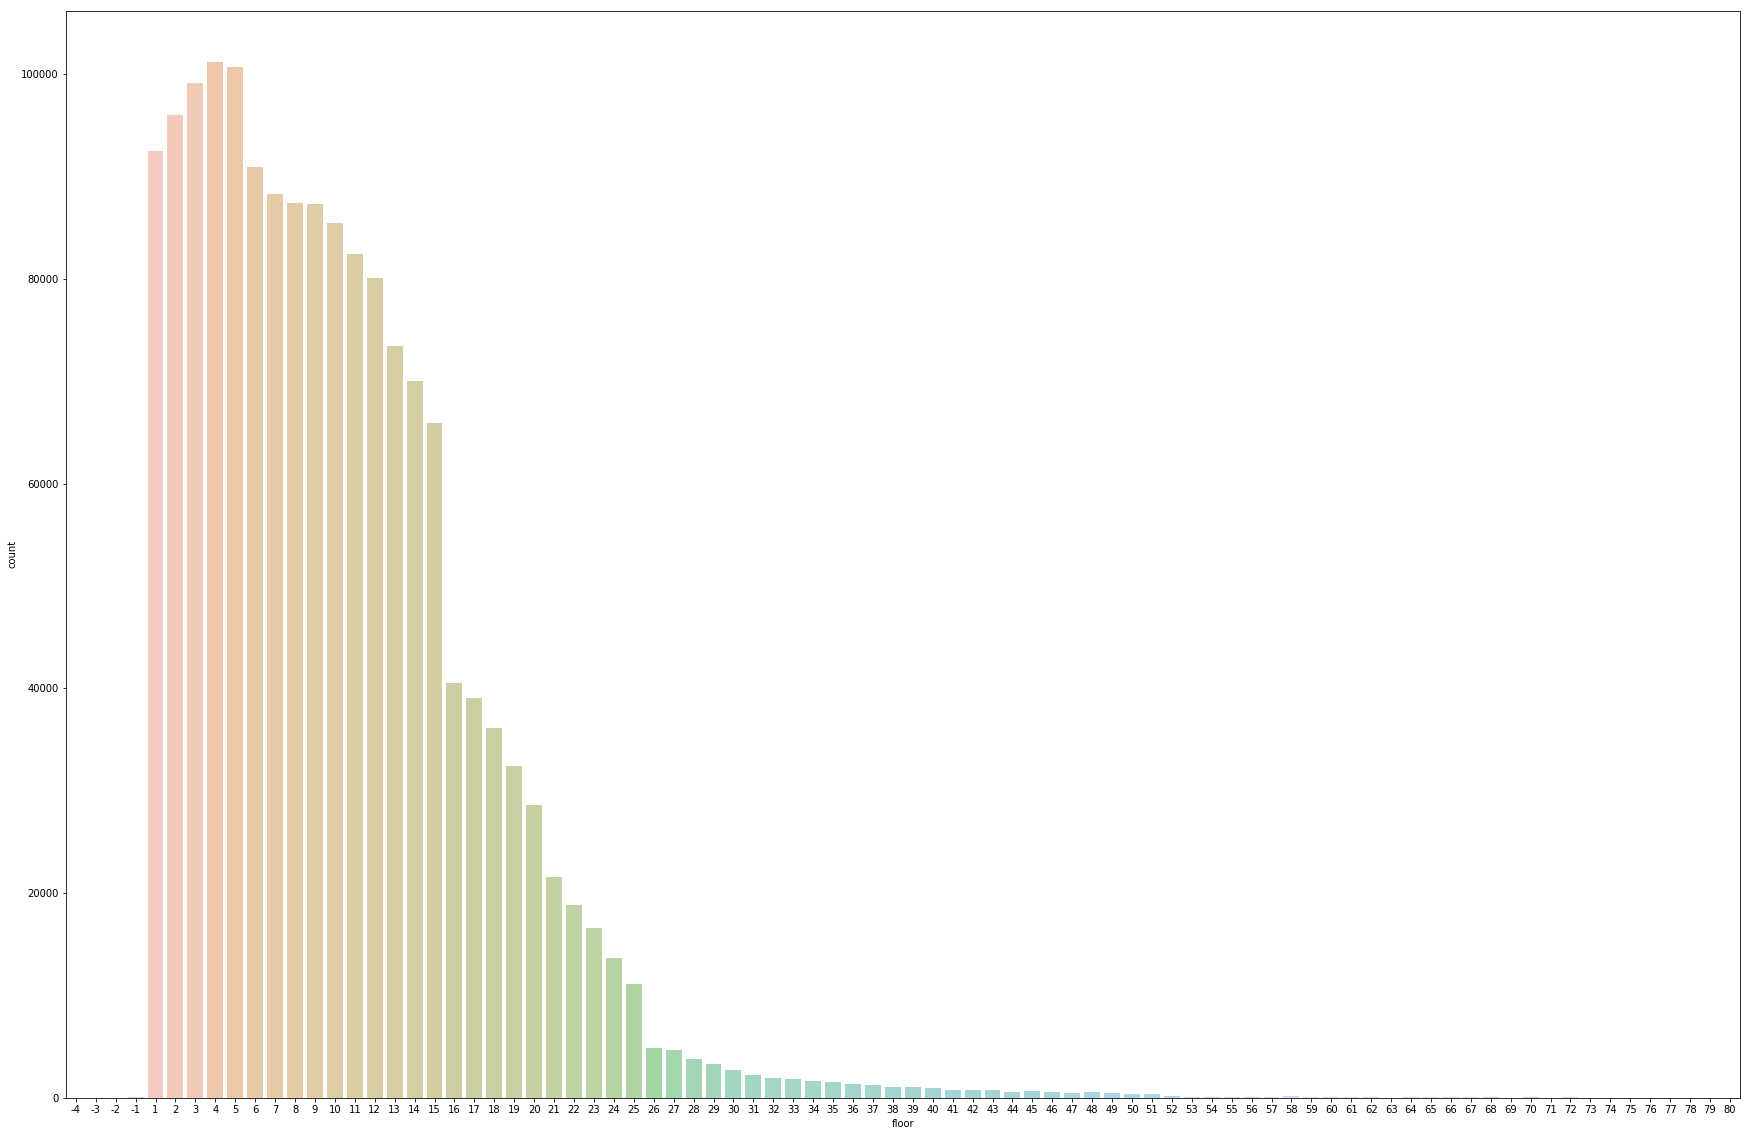

--------------------------------------------------
col :  address_by_law


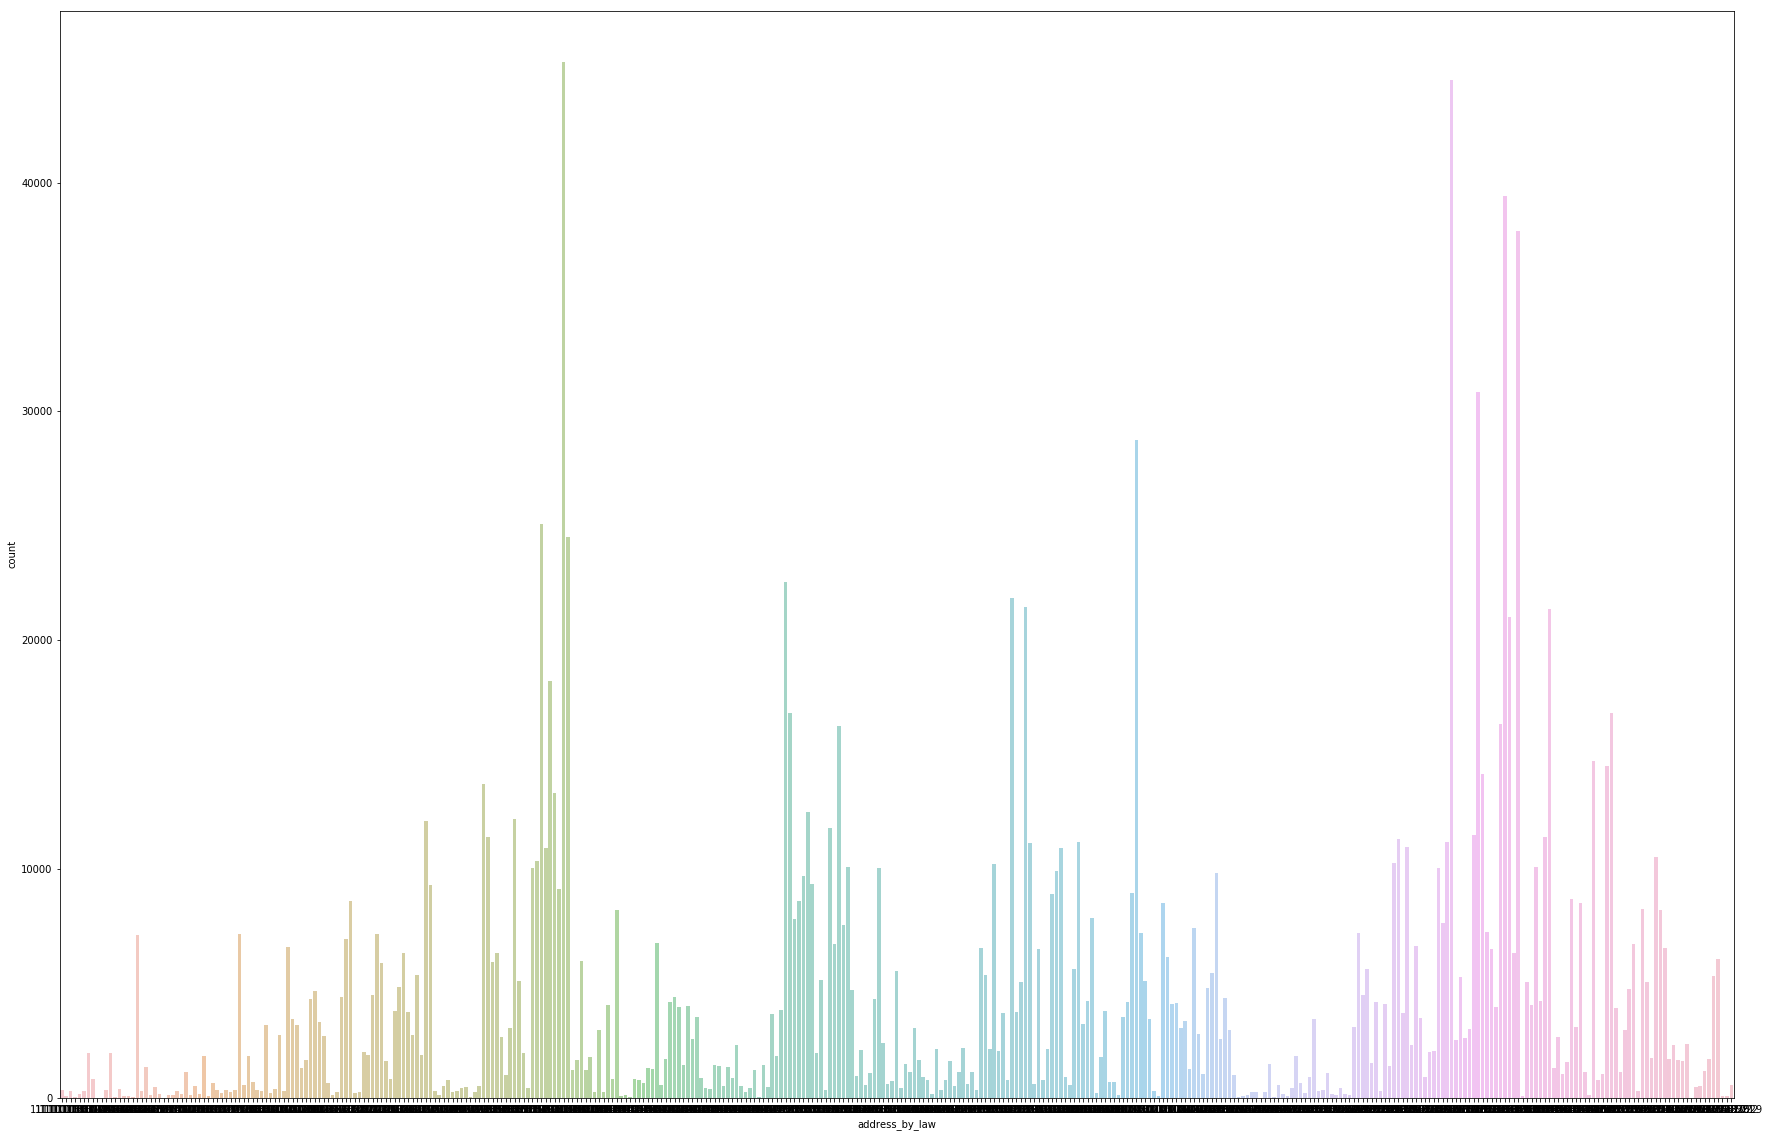

--------------------------------------------------
col :  total_parking_capacity_in_site


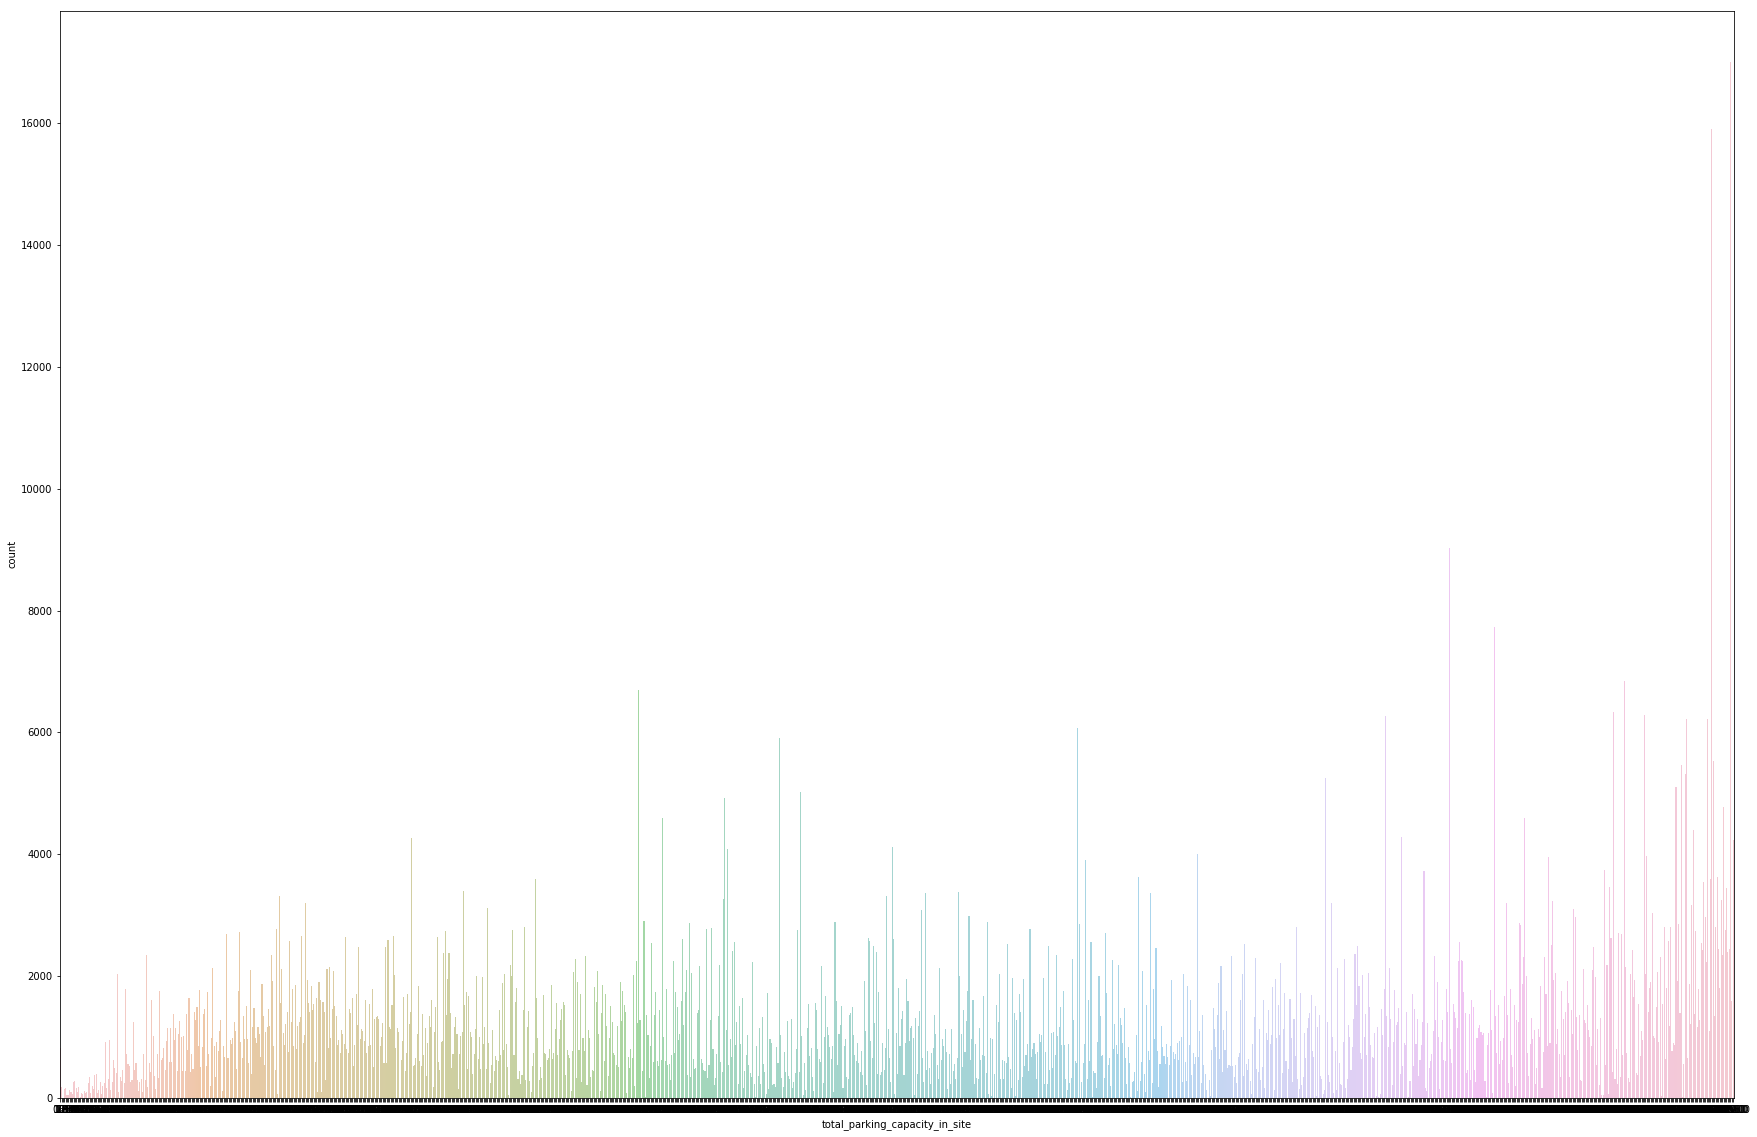

--------------------------------------------------
col :  total_household_count_in_sites


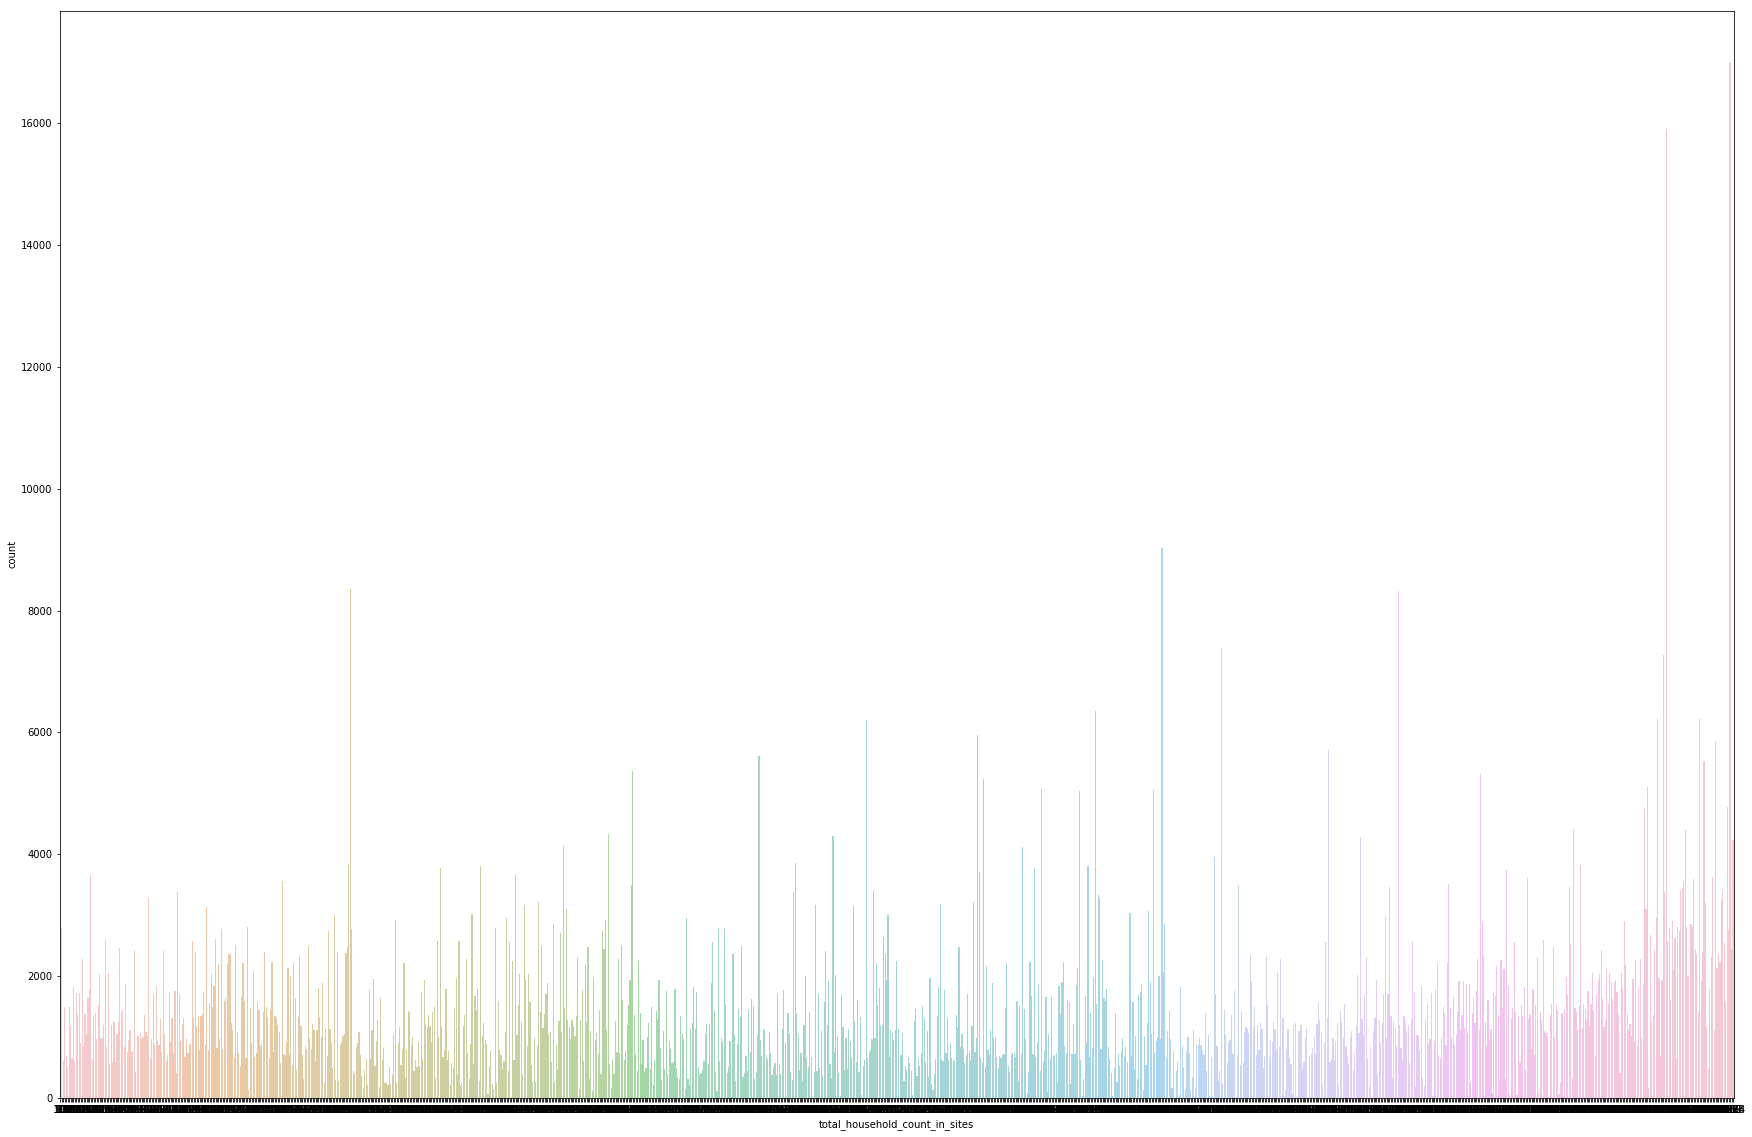

--------------------------------------------------
col :  apartment_building_count_in_sites


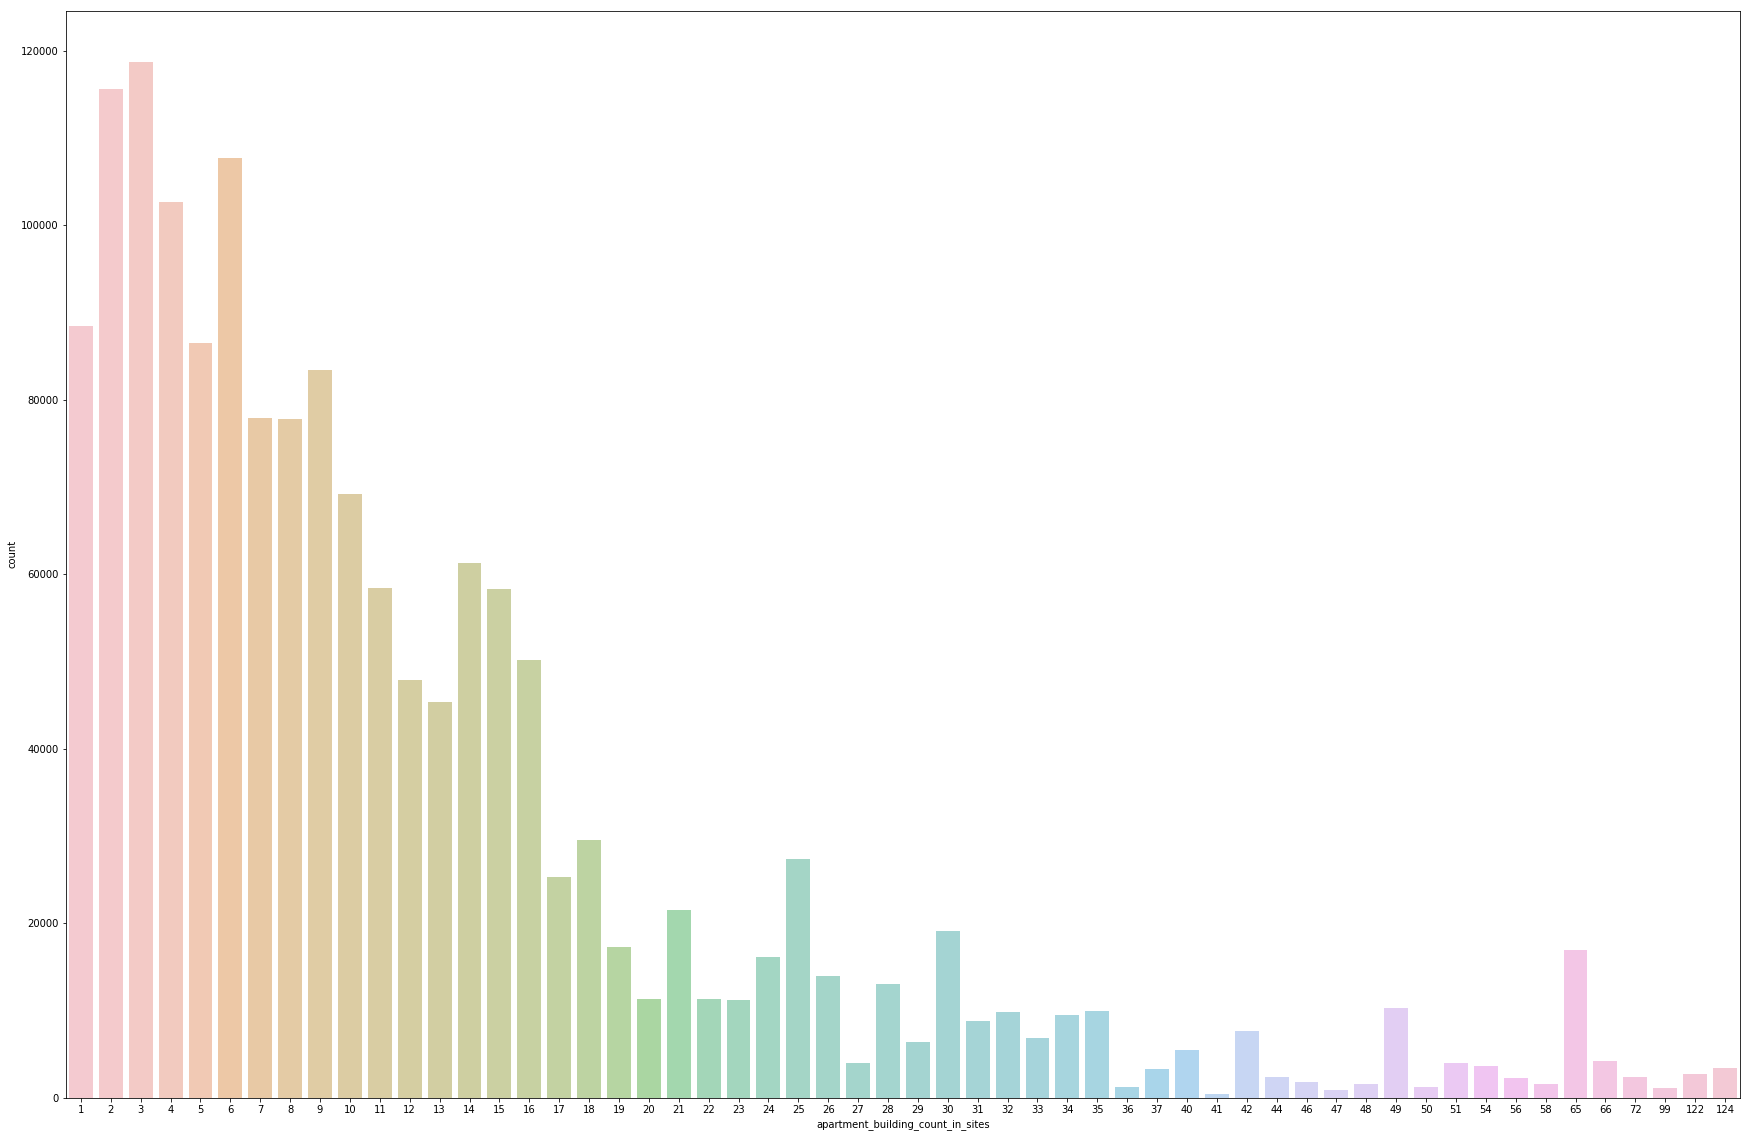

--------------------------------------------------
col :  tallest_building_in_sites


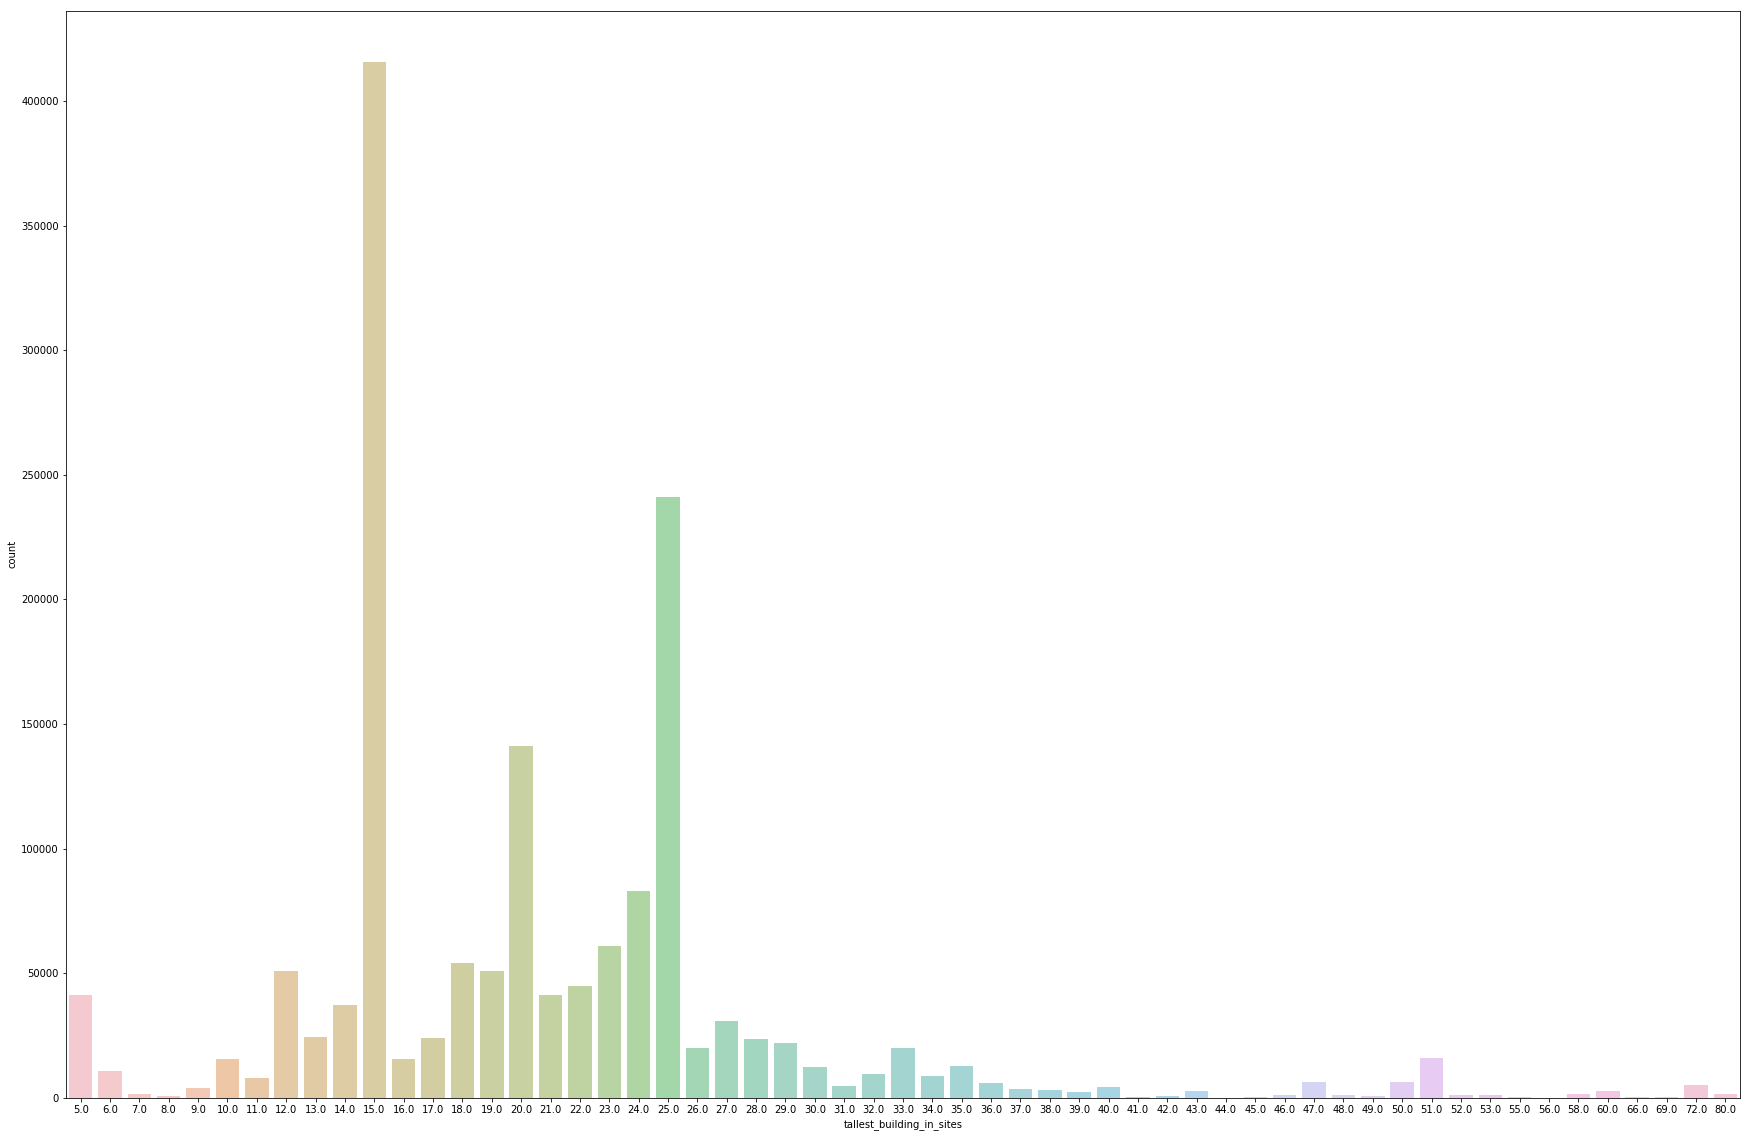

--------------------------------------------------
col :  lowest_building_in_sites


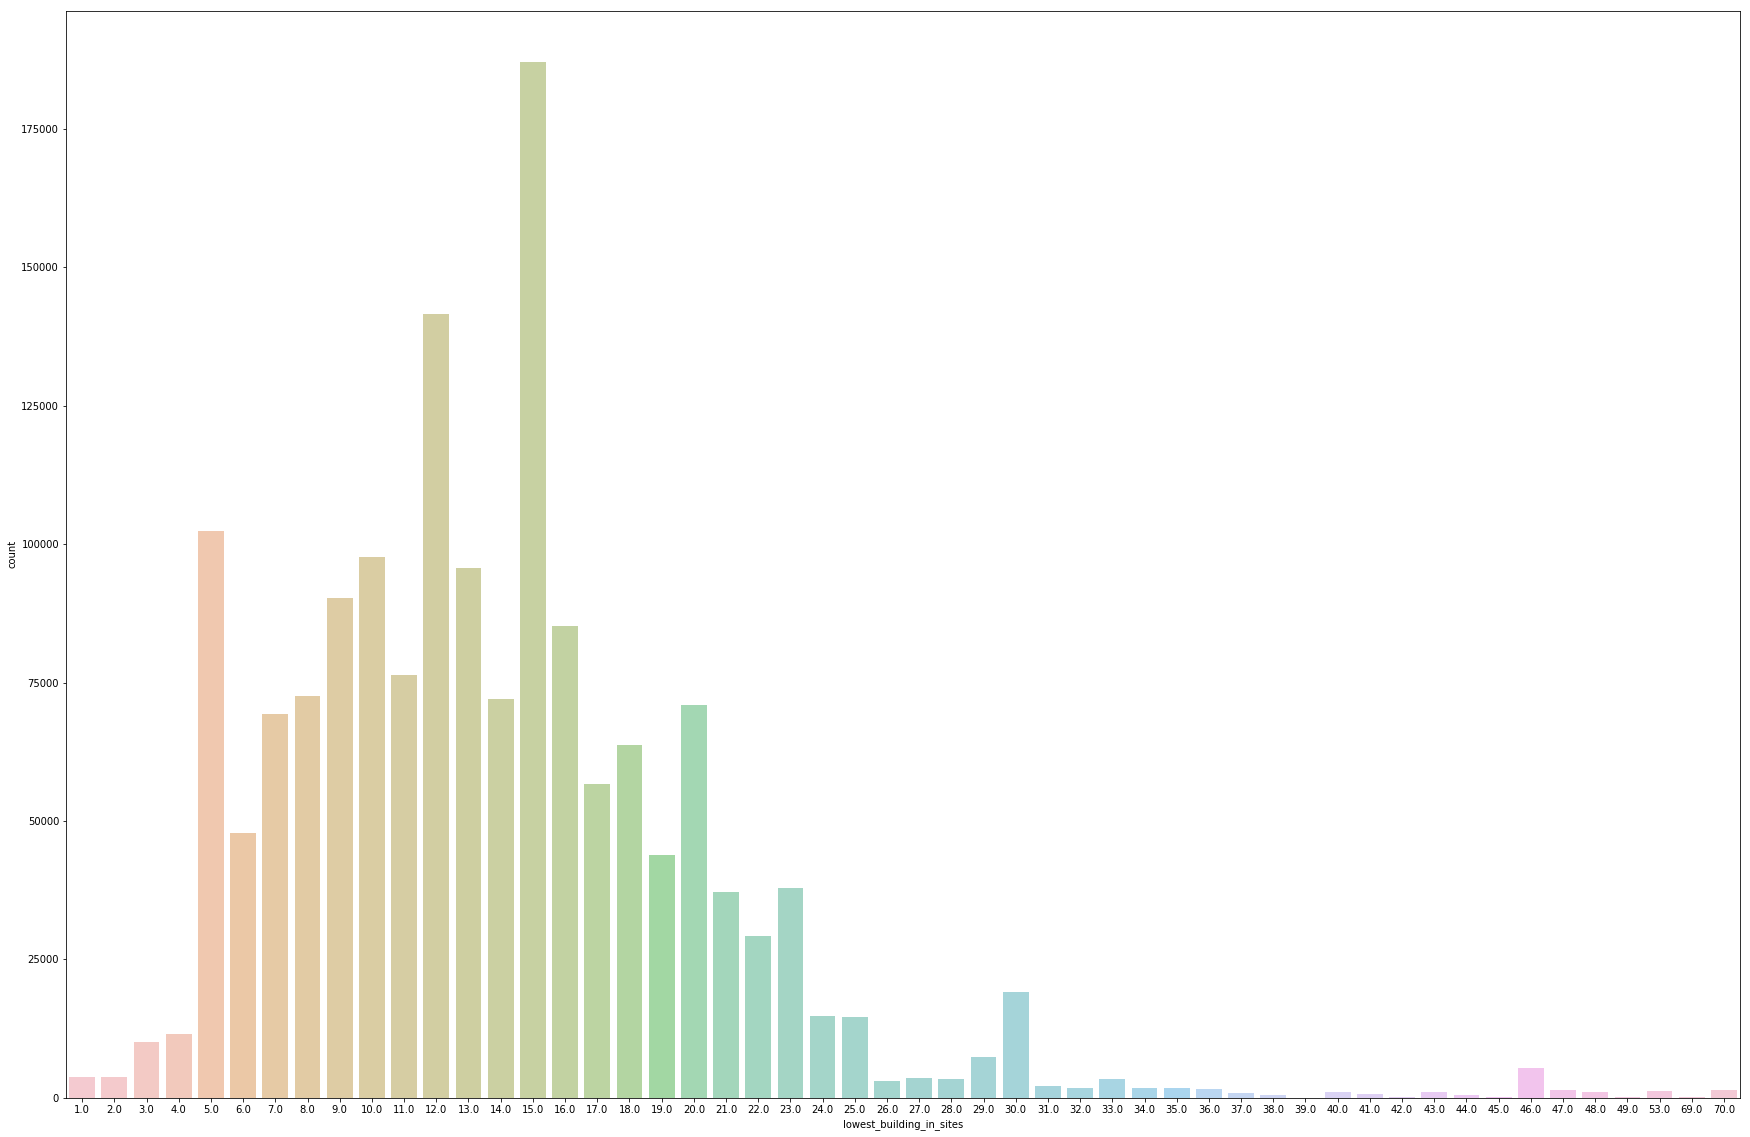

--------------------------------------------------
col :  heat_type


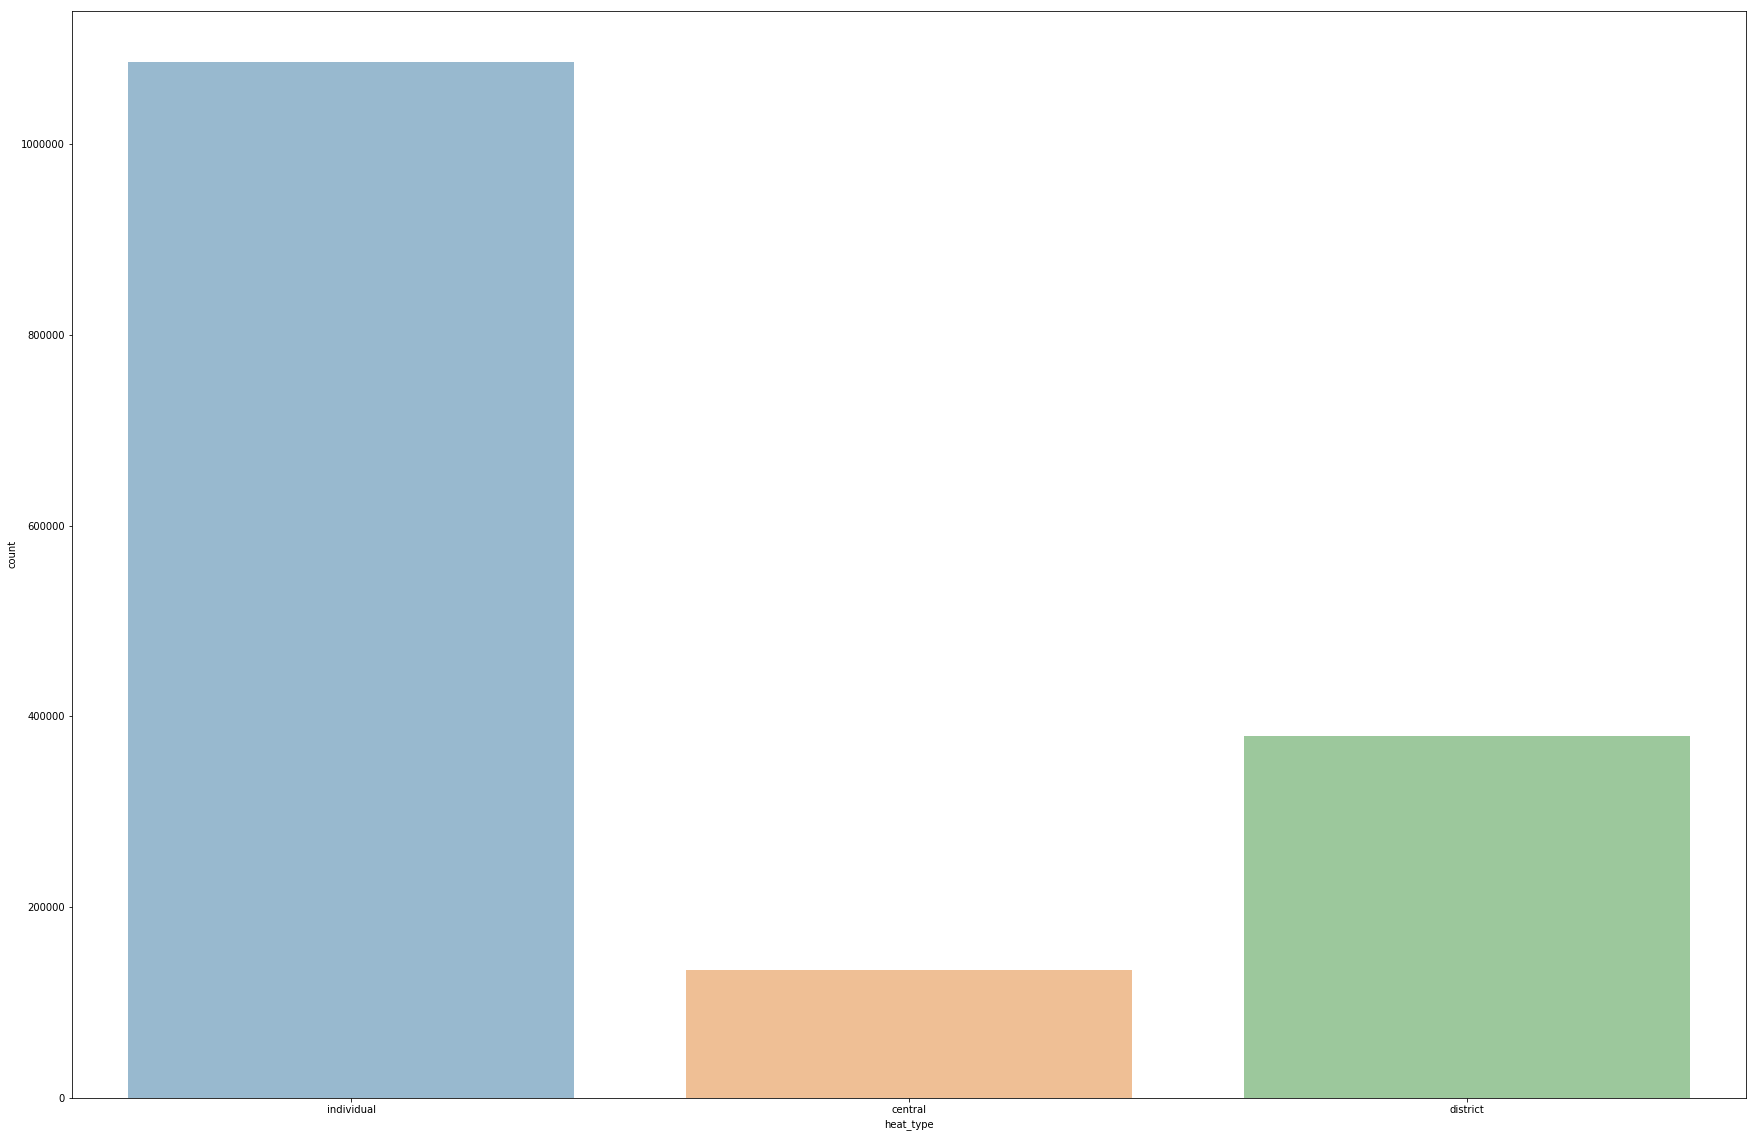

--------------------------------------------------
col :  heat_fuel


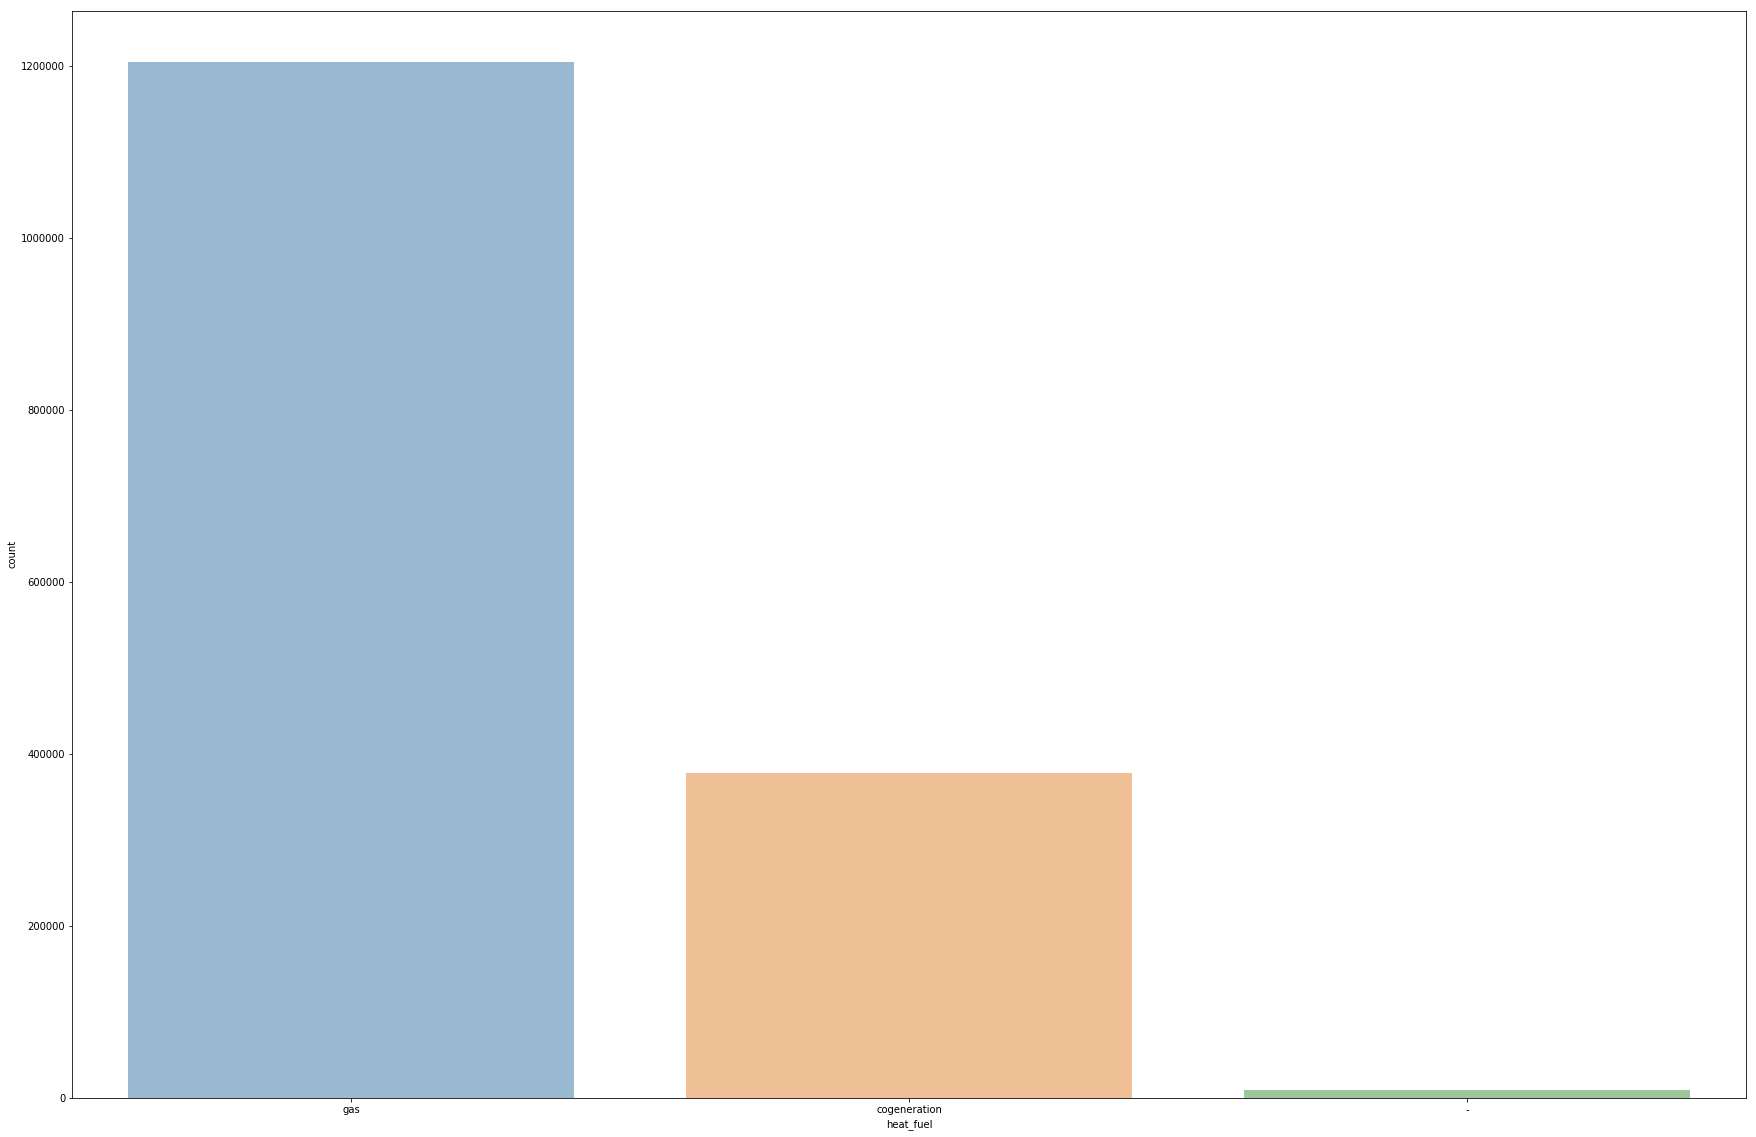

--------------------------------------------------
col :  supply_area


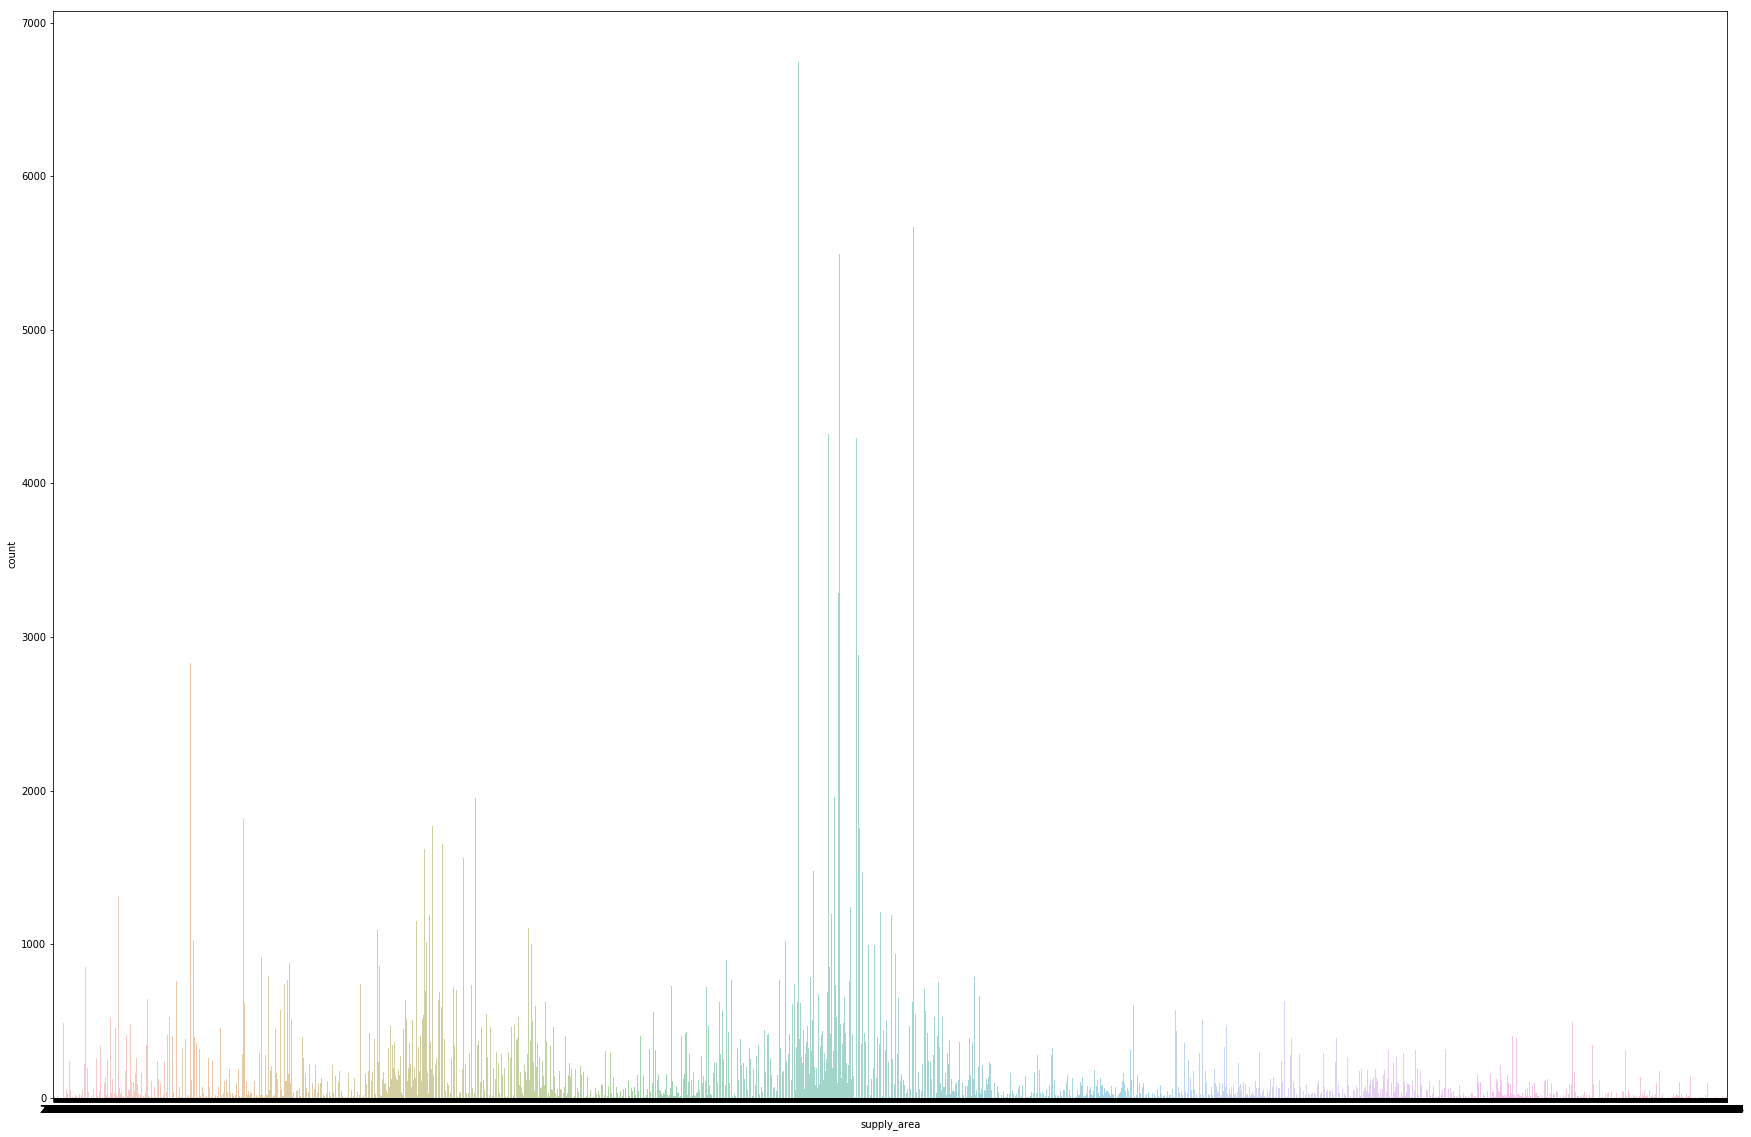

--------------------------------------------------
col :  total_household_count_of_area_type


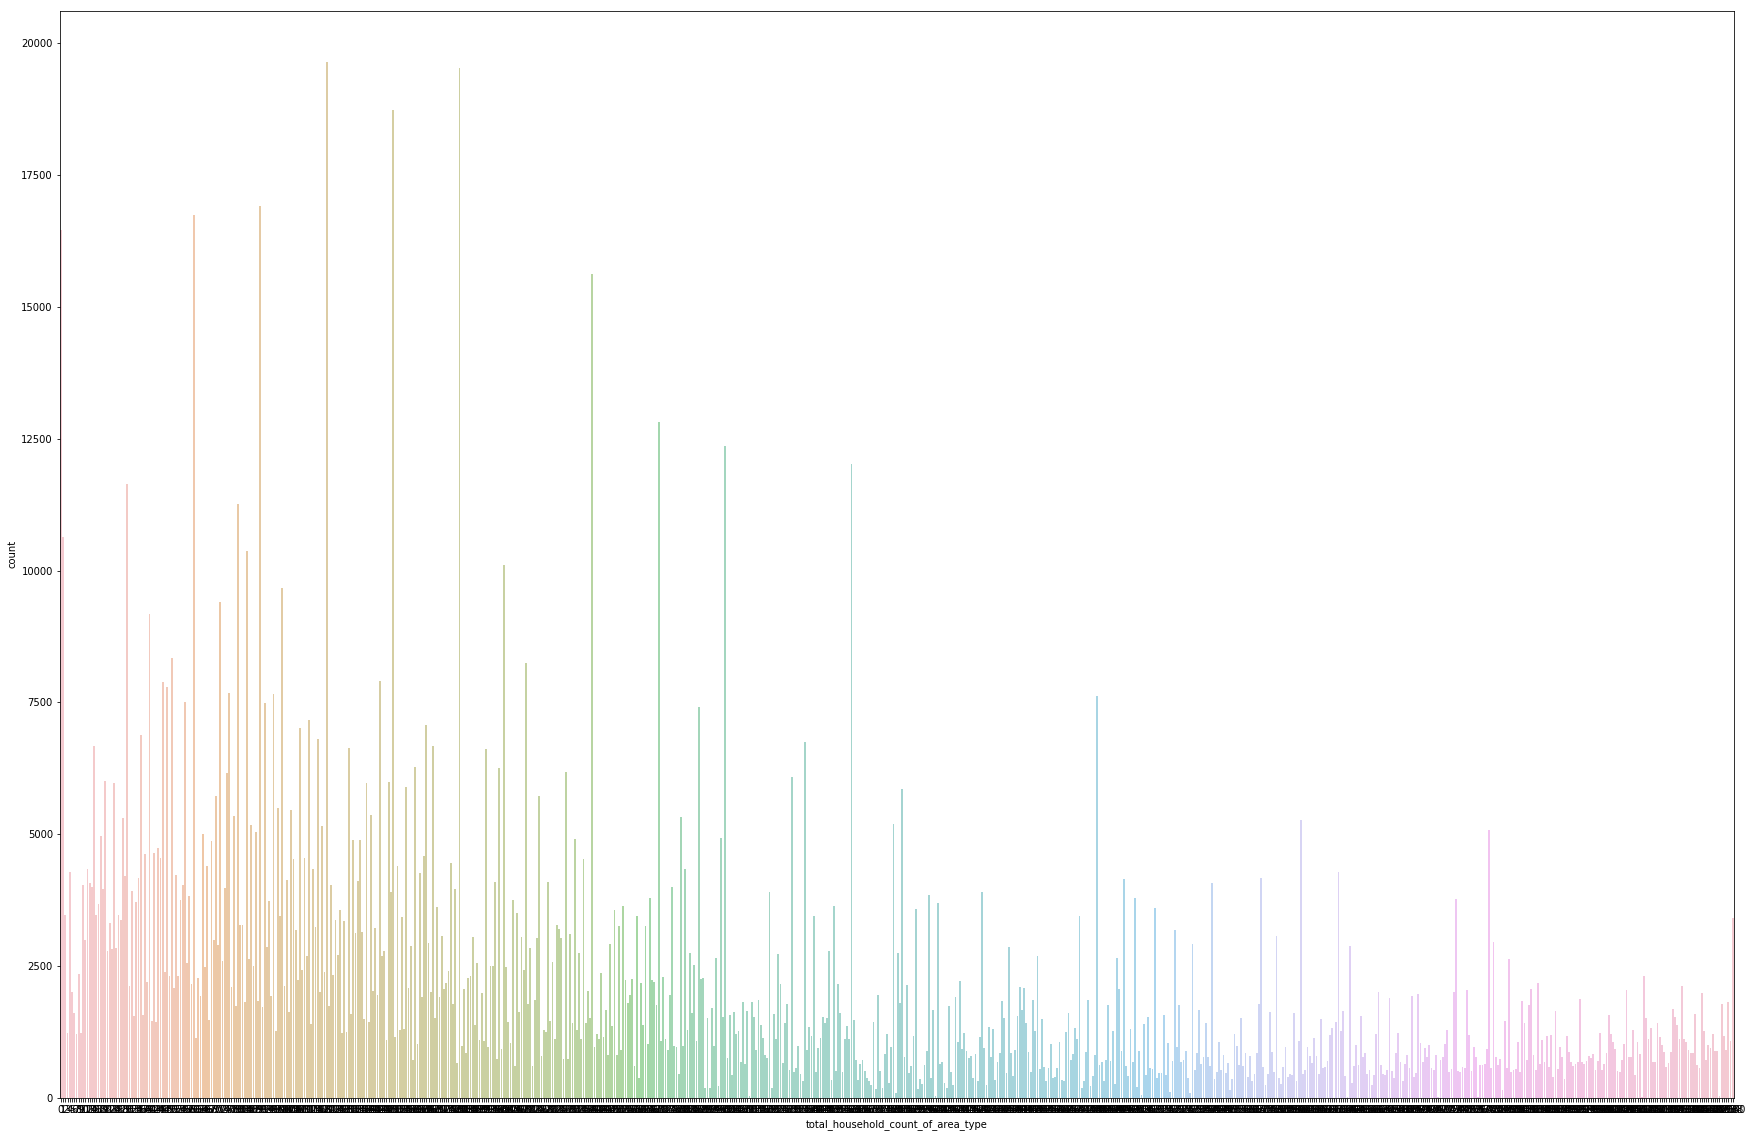

--------------------------------------------------
col :  room_count


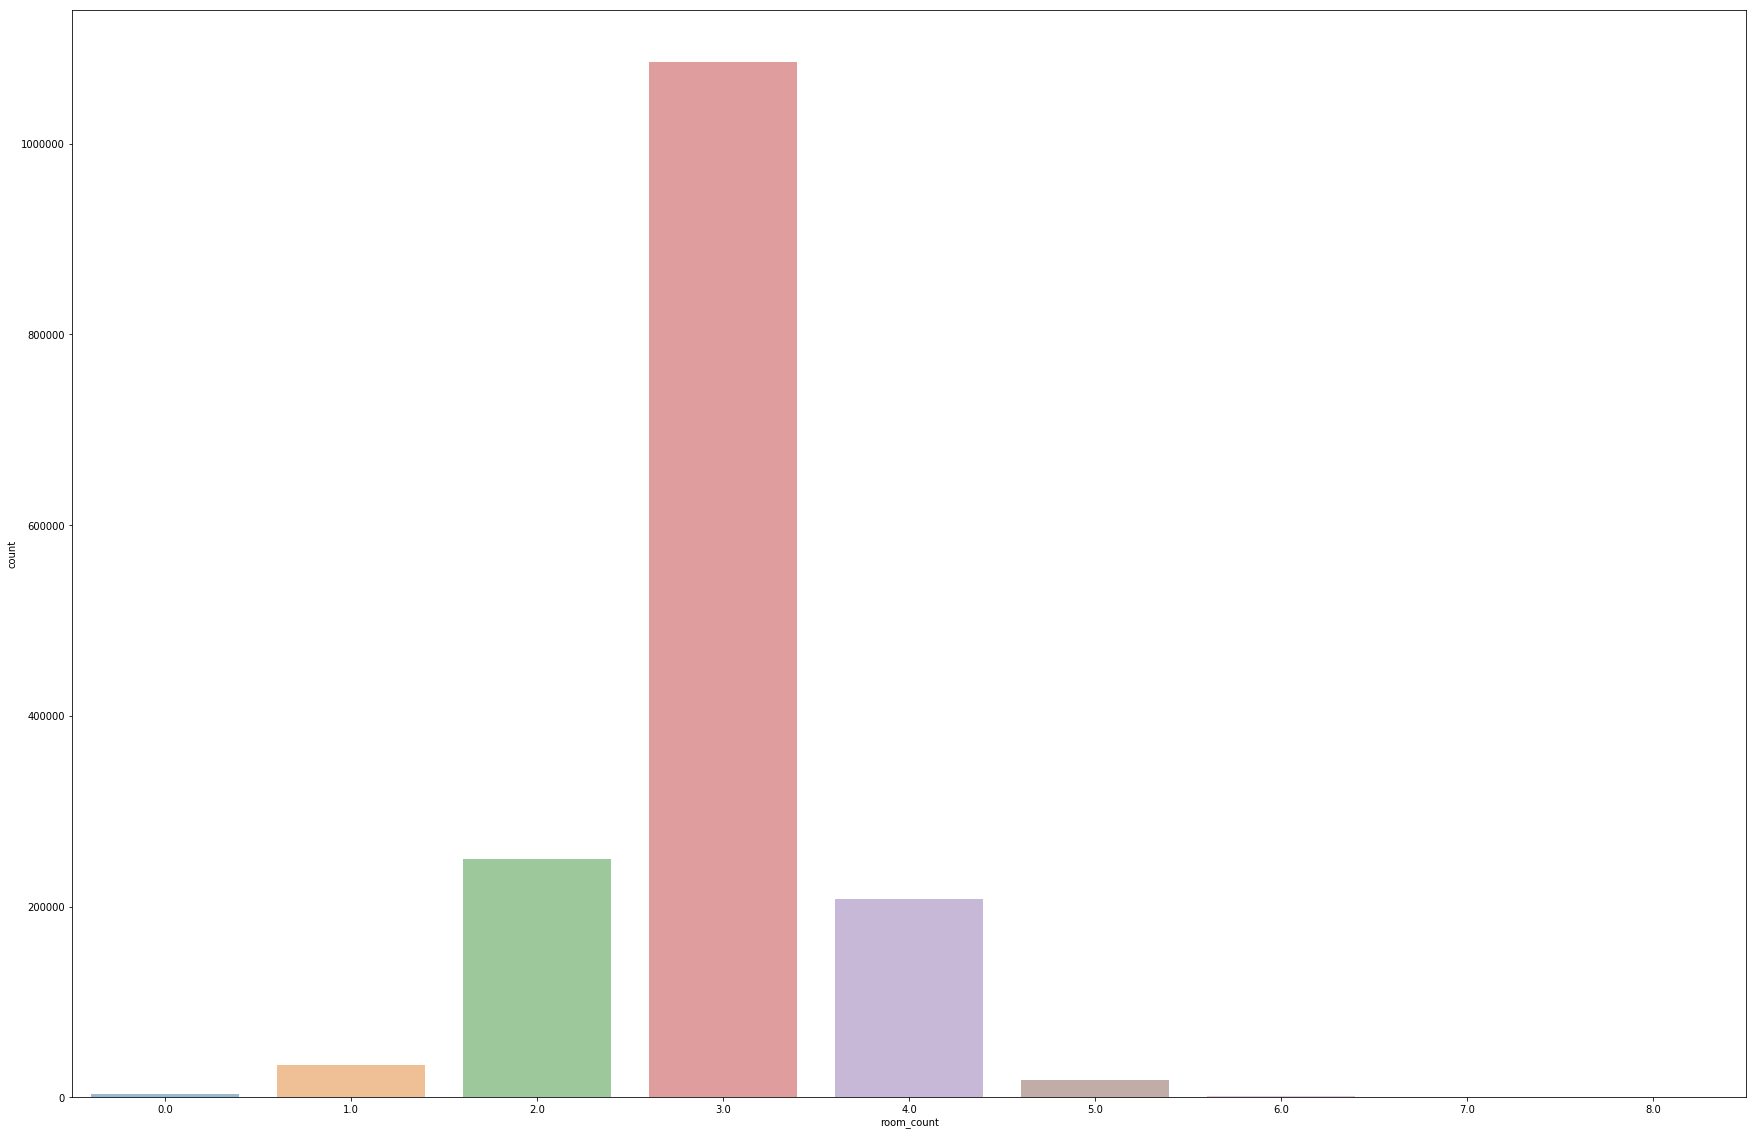

--------------------------------------------------
col :  bathroom_count


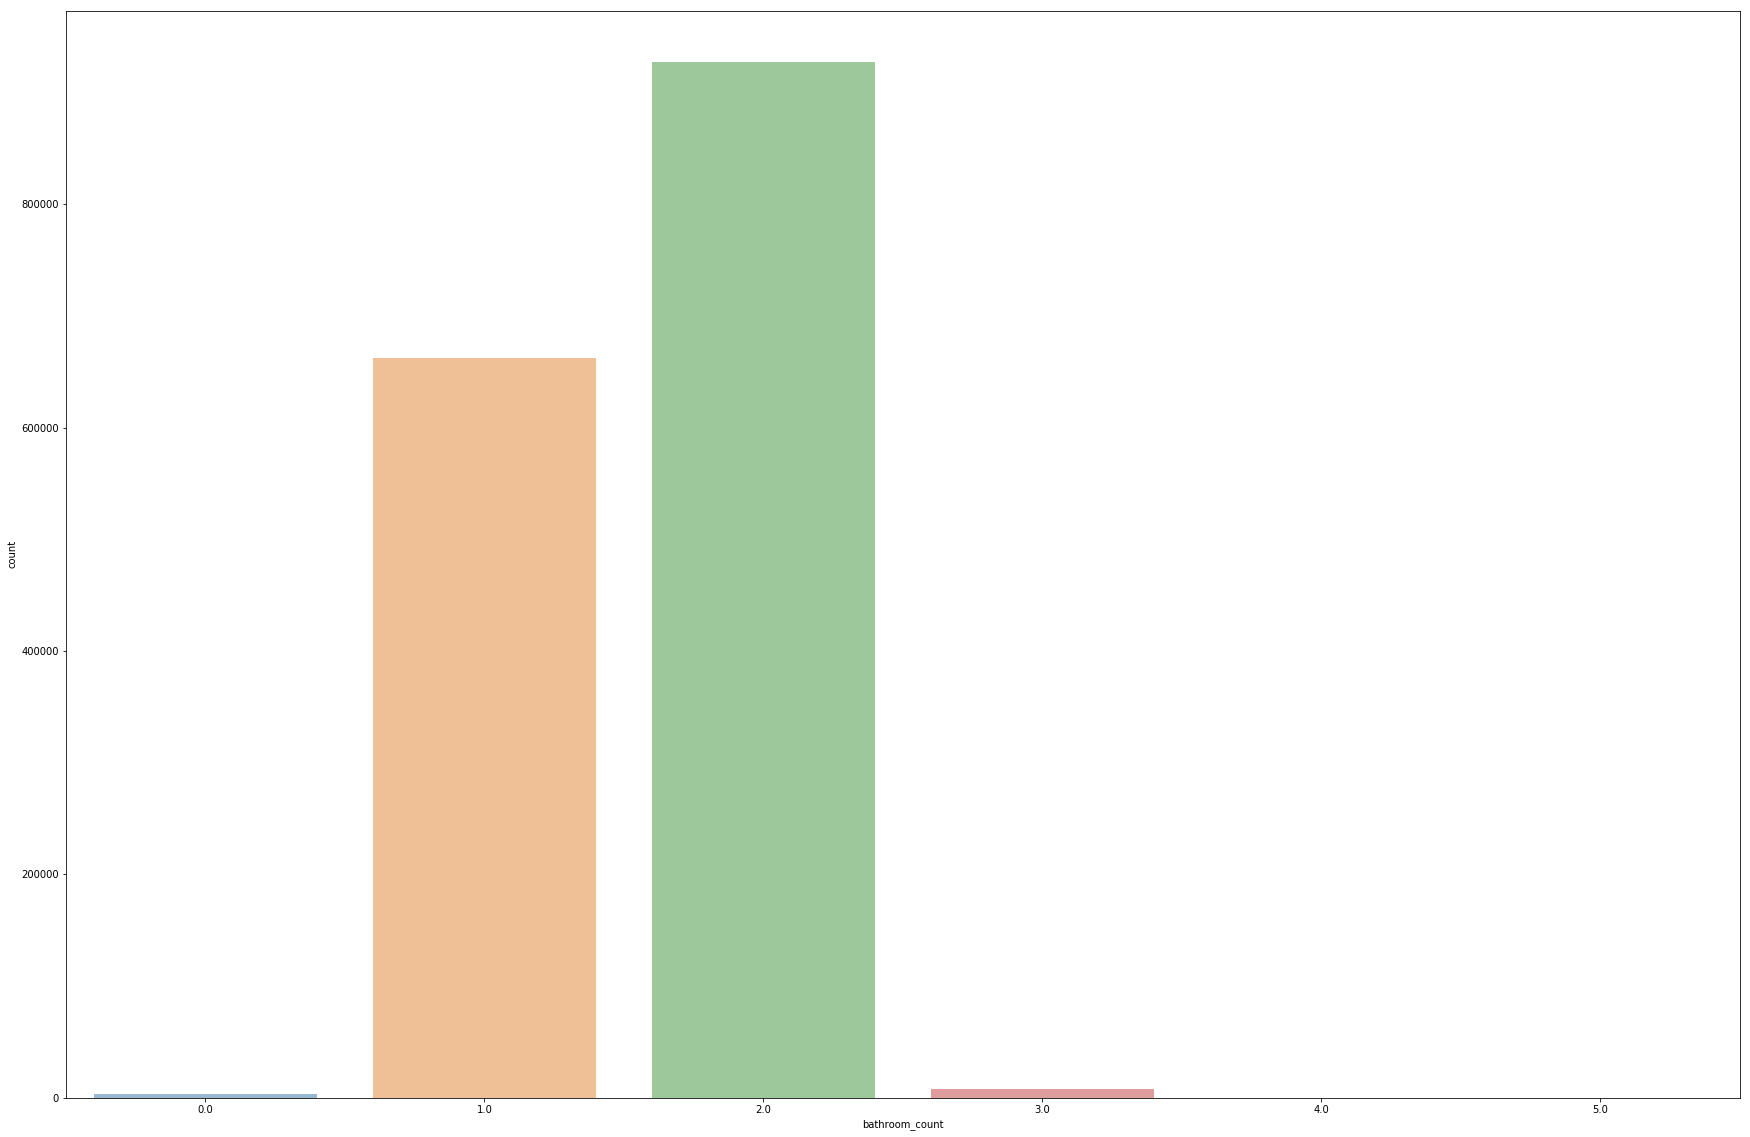

--------------------------------------------------
col :  front_door_structure


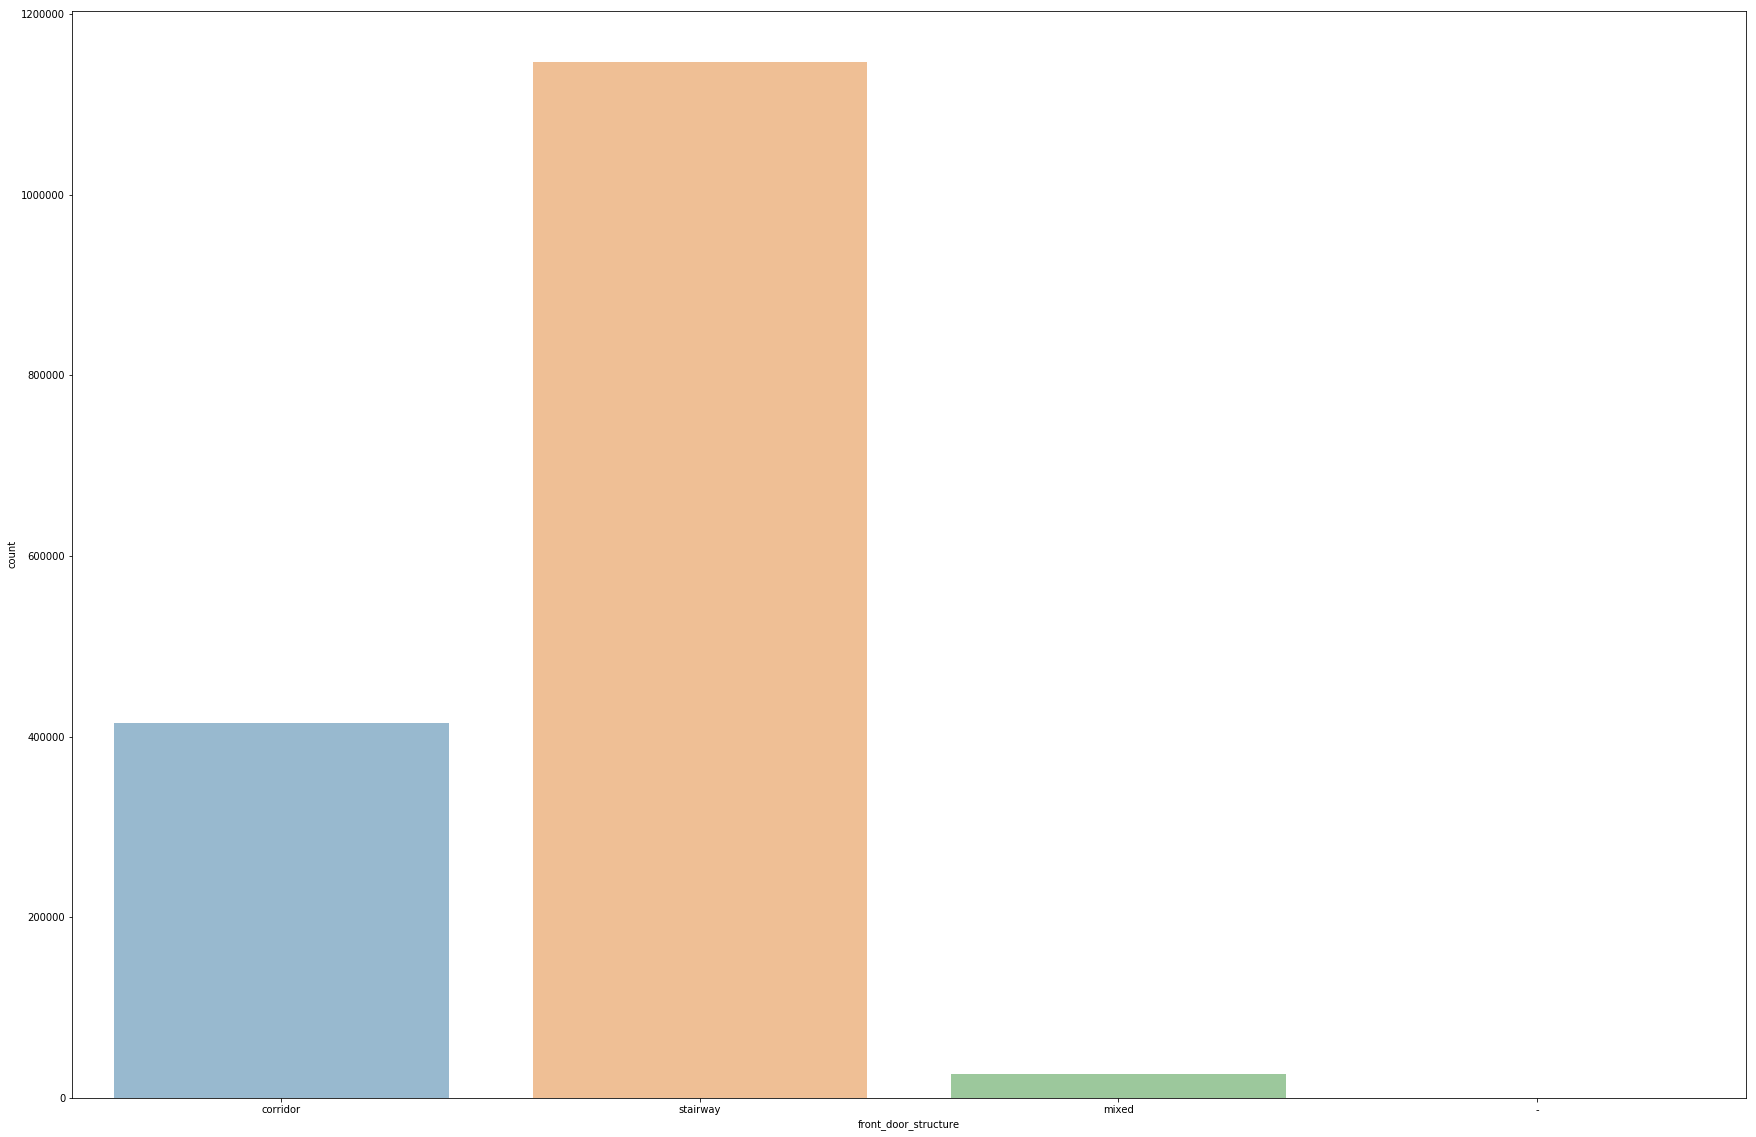

--------------------------------------------------
col :  transaction_real_price


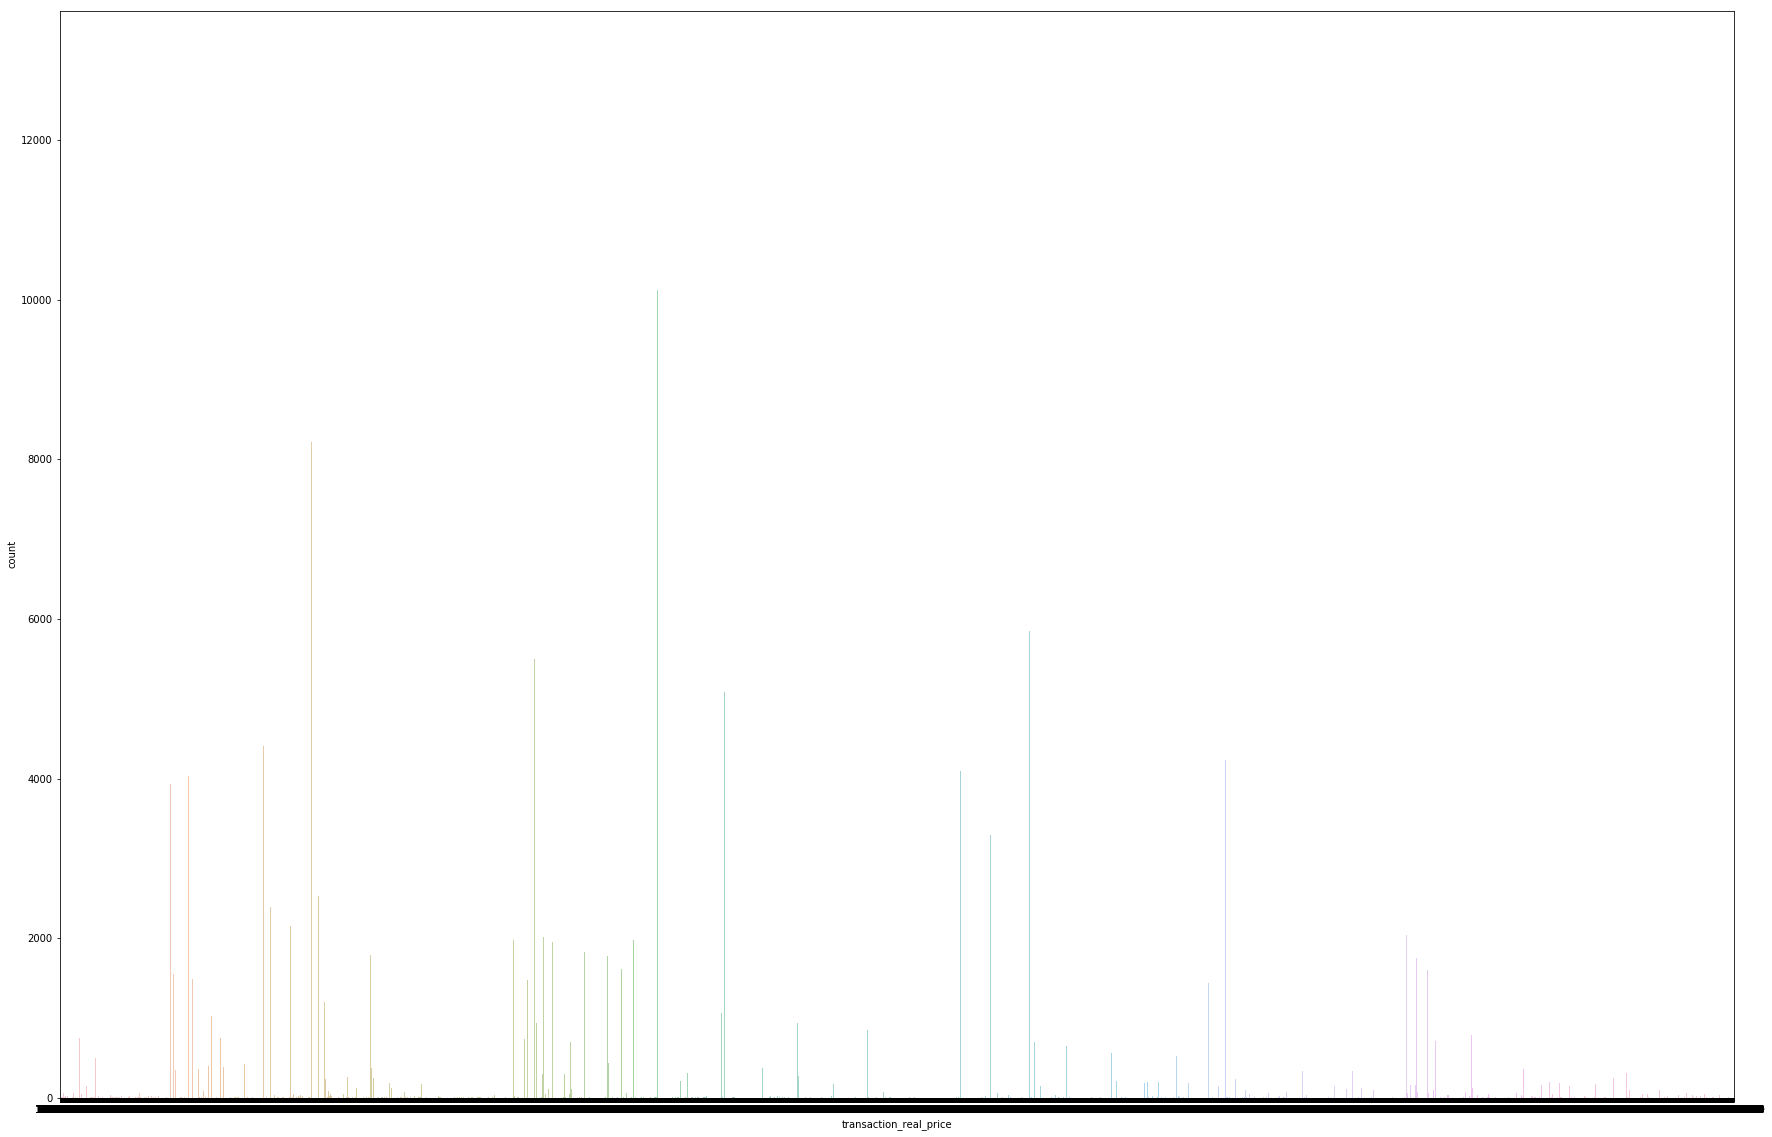

In [13]:
skip_cols = ['key','apartment_id','exclusive_use_area','latitude','longitude','room_id']
for col in train.columns:
    # 의미없어 보이는 key와 apt_id는 skip한다. 
    if col in skip_cols:
        continue
    
    # 영역 구분과 변수명 출력 
    print('-'* 50)
    print('col : ', col)
    
    f, ax = plt.subplots(figsize=(30,20))
    sns.countplot(x = col, data=train, alpha = 0.5)
    plt.show()

### Data preprocessing 

#### dropping 

In [9]:
drop = ['key','apartment_id','heat_type','heat_fuel','front_door_structure']
train.drop(drop, axis = 1, inplace = True)
test.drop(drop, axis =1, inplace = True)
# 결측치가 있는 것도 정상적으로 입력값으로 받을 것인가? XGBoost


In [10]:
train.sample(n= 20)

,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
303485,1,200806,21~30,2005,84.9900,12,37.489945,126.944512,1162010100,2251.0,2904,21,25.0,11.0,9496,110.76,816,3.0,2.0,460000000
1484776,1,201711,11~20,1987,34.9200,8,37.514322,126.923858,1156013200,NaN,160,1,10.0,10.0,25770,47.88,22,1.0,1.0,209000000
1296309,1,201608,21~31,1988,79.0700,12,37.669017,127.053771,1135010500,1196.0,2392,18,15.0,15.0,147132,105.54,240,4.0,1.0,369000000
1009109,1,201502,11~20,1996,84.9300,5,37.566162,127.040128,1120010500,454.0,430,5,24.0,14.0,7209,110.28,162,3.0,2.0,420000000
555928,1,201012,11~20,1997,84.9700,12,37.657252,127.048305,1132010700,2300.0,1981,18,24.0,16.0,6389,108.85,816,3.0,2.0,450000000
1303128,0,201609,11~20,1975,39.6700,2,35.146468,129.016938,2623011100,NaN,629,17,5.0,5.0,40807,39.67,644,2.0,1.0,66000000
1597183,1,201809,11~20,2008,84.9900,20,37.512753,127.088419,1171010100,7876.0,5563,65,33.0,21.0,13781,109.20,1201,3.0,2.0,1830000000
454809,0,200911,21~30,2001,84.8673,12,35.188653,129.062952,2647010100,438.0,408,3,21.0,20.0,147546,116.05,160,3.0,2.0,169000000
224041,1,200711,1~10,2003,70.0400,4,37.502982,127.117374,1171010400,111.0,106,1,15.0,8.0,39787,88.97,8,3.0,1.0,300000000
1064729,0,201504,21~30,2011,84.7808,20,35.338713,129.163924,2671025627,1128.0,978,13,20.0,18.0,54538,105.99,430,3.0,2.0,246000000


In [11]:
all_ = train.append(test)
# train 1601458 
# test start from 1601458 

In [12]:
all_.head()

,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
0,1,200601,11~20,1999,47.43,6,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,91120,65.63,46,1.0,1.0,215000000
1,1,200601,11~20,1999,44.37,8,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,91119,61.39,10,2.0,1.0,200000000
2,1,200601,11~20,1992,54.70,8,37.580511,127.014016,1111017400,902.0,585,5,14.0,9.0,8430,72.36,201,2.0,1.0,168000000
3,1,200601,11~20,1993,64.66,11,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,5839,87.30,284,2.0,1.0,165000000
4,1,200601,11~20,1993,106.62,7,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,5836,127.74,112,4.0,2.0,280000000


### Feature Engineering 

In [13]:
trans_date = {'1~10':'월초','11~20':'월중','21~28':'월말', '21~29':'월말','21~30':'월말', '21~31':'월말'}
all_['transaction_date'] = [trans_date[i] for i in all_['transaction_date']]

In [14]:
all_.head()

,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
0,1,200601,월중,1999,47.43,6,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,91120,65.63,46,1.0,1.0,215000000
1,1,200601,월중,1999,44.37,8,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,91119,61.39,10,2.0,1.0,200000000
2,1,200601,월중,1992,54.70,8,37.580511,127.014016,1111017400,902.0,585,5,14.0,9.0,8430,72.36,201,2.0,1.0,168000000
3,1,200601,월중,1993,64.66,11,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,5839,87.30,284,2.0,1.0,165000000
4,1,200601,월중,1993,106.62,7,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,5836,127.74,112,4.0,2.0,280000000


In [15]:
# 날짜 데이터를 숫자로 변환 
# 월 단위 숫자로 변환. 
# train['transaction_year_month'] = train['transaction_year_month'].astype(str)
def date_to_int(df):
    df['transaction_year_month'] = df['transaction_year_month'].astype(str)
    Y = [int(a[:4]) for a in df['transaction_year_month']]
    M = [int(a[4:]) for a in df['transaction_year_month']]
    int_date=[]
    for i in range(len(Y)):
        int_date.append((Y[i] - 2006) * 12 +M[i])
    df['transaction_int_date'] = int_date
    
    return df
# int(train.transaction_year_month[0][:4])
# train['transaction_int_date'] = train['transaction_year_month'].map(date_to_int).astype(np.int8)


In [20]:
test = date_to_int(all_)
test.info()
# all_.drop('transaction_year_month',axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605376 entries, 0 to 3917
Data columns (total 21 columns):
city                                  1605376 non-null int64
transaction_year_month                1605376 non-null object
transaction_date                      1605376 non-null object
year_of_completion                    1605376 non-null int64
exclusive_use_area                    1605376 non-null float64
floor                                 1605376 non-null int64
latitude                              1605376 non-null float64
longitude                             1605376 non-null float64
address_by_law                        1605376 non-null int64
total_parking_capacity_in_site        1513192 non-null float64
total_household_count_in_sites        1605376 non-null int64
apartment_building_count_in_sites     1605376 non-null int64
tallest_building_in_sites             1605366 non-null float64
lowest_building_in_sites              1605366 non-null float64
room_id               

#### Address

In [21]:
test['address_by_law'] = test['address_by_law'].astype(str)
test['district'] = test['address_by_law'].apply(lambda x: x[:5])

In [25]:
test=test.drop(columns = ['address_by_law','transaction_year_month','transaction_date','exclusive_use_area','latitude','longitude','room_id'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605376 entries, 0 to 3917
Data columns (total 15 columns):
city                                  1605376 non-null int64
year_of_completion                    1605376 non-null int64
floor                                 1605376 non-null int64
total_parking_capacity_in_site        1513192 non-null float64
total_household_count_in_sites        1605376 non-null int64
apartment_building_count_in_sites     1605376 non-null int64
tallest_building_in_sites             1605366 non-null float64
lowest_building_in_sites              1605366 non-null float64
supply_area                           1605376 non-null float64
total_household_count_of_area_type    1605376 non-null int64
room_count                            1604680 non-null float64
bathroom_count                        1604680 non-null float64
transaction_real_price                1605376 non-null int64
transaction_int_date                  1605376 non-null int64
district                

In [30]:
# test
list4 = []
s_center = ['11110','11140','11170']
s_eastnorth = ['11200','11215','11230','11260','11290','11305','11320','11350'] 
s_westnorth = ['11380','11410','11440'] 
s_westsouth = ['11470','11500','11530','11545','11560','11590','11620']
s_eastsouth = ['11650','11680','11710','11740']
p_center = ['26110','26140','26170','26200','26230','26290','26470','26500']
p_east = ['26350','26410','26260','26710']
p_west=['26320','26440','26530','26380']

for i in test['district']:
    if i in s_center:
        list4.append('도심권')
    elif i in s_eastnorth:
        list4.append('동북권')
    elif i in s_westnorth:
        list4.append('서북권')
    elif i in s_westsouth:
        list4.append('서남권')
    elif i in s_eastsouth:
        list4.append('동남권')
    elif i in p_center:
        list4.append('중부산권')
    elif i in p_east:
        list4.append('동부산권')
    else:
        list4.append('서부산권')

In [33]:
# test['district_group'] = list4
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605376 entries, 0 to 3917
Data columns (total 16 columns):
city                                  1605376 non-null int64
year_of_completion                    1605376 non-null int64
floor                                 1605376 non-null int64
total_parking_capacity_in_site        1513192 non-null float64
total_household_count_in_sites        1605376 non-null int64
apartment_building_count_in_sites     1605376 non-null int64
tallest_building_in_sites             1605366 non-null float64
lowest_building_in_sites              1605366 non-null float64
supply_area                           1605376 non-null float64
total_household_count_of_area_type    1605376 non-null int64
room_count                            1604680 non-null float64
bathroom_count                        1604680 non-null float64
transaction_real_price                1605376 non-null int64
transaction_int_date                  1605376 non-null int64
district                

In [43]:
# test['city'] = test['city'].apply(lambda x :'seoul' if x == 1 else 'busan' )
# test['floor'] = test['floor'].apply(lambda x : '저층' if x < 8 else '중층' if 8<x<18 else '고층' if 18<=x<=30 else '초고층') 
# test.drop('district', axis= 1, inplace= True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605376 entries, 0 to 3917
Data columns (total 15 columns):
city                                  1605376 non-null object
year_of_completion                    1605376 non-null int64
floor                                 1605376 non-null object
total_parking_capacity_in_site        1513192 non-null float64
total_household_count_in_sites        1605376 non-null int64
apartment_building_count_in_sites     1605376 non-null int64
tallest_building_in_sites             1605366 non-null float64
lowest_building_in_sites              1605366 non-null float64
supply_area                           1605376 non-null float64
total_household_count_of_area_type    1605376 non-null int64
room_count                            1604680 non-null float64
bathroom_count                        1604680 non-null float64
transaction_real_price                1605376 non-null int64
transaction_int_date                  1605376 non-null int64
district_group        

In [41]:
# Data preprocess and feature engineering 
def apply_transform(test):
    features = []
    
    test['total_parking_capacity_in_site'] = test['total_parking_capacity_in_site'].fillna(test['total_parking_capacity_in_site'].mean).astype(np.int16)
    features.append('total_parking_capacity_in_site')
    
    test['room_count'] = test['room_count'].fillna(test['room_count'].mean).astype(np.int16)
    features.append('room_count')
    test['bathroom_count'] = test['bathroom_count'].fillna(test['bathroom_count'].mean).astype(np.int16)
    features.append('bathroom_count')
    test['tallest_building_in_sites'] = test['tallest_building_in_sites'].fillna(0.0).astype(np.int16)
    features,append('tallest_building_in_sites')
    test['lowest_building_in_sites'] = test['lowest_building_in_sites'].fillna(0.0).astype(np.int16)
    features,append('lowest_building_in_sites')
    
    

city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        92184
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                10
lowest_building_in_sites                 10
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              696
bathroom_count                          696
transaction_real_price                    0
transaction_int_date                      0
district                                  0
dtype: int64

In [38]:
all_.dtypes

city                                    int64
transaction_date                        int64
year_of_completion                      int64
exclusive_use_area                    float64
floor                                   int64
latitude                              float64
longitude                             float64
total_household_count_in_sites          int64
apartment_building_count_in_sites       int64
room_id                                 int64
supply_area                           float64
total_household_count_of_area_type      int64
transaction_real_price                  int64
transaaction_year                       int64
transaction_month                       int64
transaction_data                        int64
district                                int64
street                                  int64
etc_address                             int64
dtype: object

In [41]:
all_.drop('exclusive_use_area', axis = 1, inplace = True)

In [43]:
all_.tail(n=5)

,city,transaction_date,year_of_completion,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_real_price,transaaction_year,transaction_month,transaction_data,district,street,etc_address
1605371,1,2,1987,4,37.652529,127.064082,840,19,6038,37.38,840,0,2018,10,2,350,105,0
1605372,1,2,2004,25,37.621150,127.010829,2075,21,9468,102.49,648,0,2018,10,2,305,101,0
1605373,1,2,1994,15,37.643436,127.017889,146,1,35853,71.47,29,0,2018,10,2,305,103,0
1605374,1,2,1999,5,37.604326,127.017168,860,8,6280,108.75,0,0,2018,10,2,290,133,0
1605375,0,2,2011,4,35.338713,129.163924,978,13,54538,105.99,430,0,2018,10,2,710,256,27


In [45]:
all_y = all_['transaction_real_price']
no_norm_Y = all_['transaction_real_price'][:1601458] # train data_Y
all_.drop(['transaction_real_price'], axis = 1, inplace = True)
no_normalization = all_ # 정규화 하지 않은 값 
all_=((all_-all_.min())/(all_.max()-all_.min())) # min/max scailing, [0,1]
all_.sample(n=5) 

,city,transaction_date,year_of_completion,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaaction_year,transaction_month,transaction_data,district,street,etc_address
192179,0.0,0.0,0.767857,0.130952,0.041613,0.965051,0.043016,0.024390,0.488158,0.614679,0.043243,0.083333,0.545455,0.0,0.380952,0.017467,0.0
777353,0.0,0.0,0.750000,0.261905,0.038337,0.930106,0.061050,0.000000,0.858041,0.051401,0.091216,0.583333,0.363636,0.0,0.190476,0.004367,0.0
1255426,1.0,0.0,0.750000,0.226190,0.961947,0.140350,0.009165,0.008130,0.181607,0.204711,0.054392,0.833333,0.454545,0.0,0.238095,0.000000,0.0
1283579,1.0,0.5,0.607143,0.250000,0.994621,0.121078,0.349298,0.121951,0.032839,0.130498,0.001351,0.833333,0.636364,0.5,0.333333,0.030568,0.0
1060773,1.0,1.0,0.642857,0.214286,0.997093,0.123255,0.179453,0.065041,0.069934,0.083362,0.092905,0.750000,0.272727,1.0,0.380952,0.017467,0.0


In [46]:
#train 1601458
#test start from 1601458
train = all_[:1601458]
no_normalization_train = no_normalization[:1601458]

In [47]:
train.head()

,city,transaction_date,year_of_completion,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaaction_year,transaction_month,transaction_data,district,street,etc_address
0,1.0,0.5,0.660714,0.119048,0.961473,0.101869,0.005469,0.00000,0.473926,0.112894,0.015541,0.0,0.0,0.5,0.0,0.305677,0.0
1,1.0,0.5,0.660714,0.142857,0.961473,0.101869,0.005469,0.00000,0.473920,0.102380,0.003378,0.0,0.0,0.5,0.0,0.305677,0.0
2,1.0,0.5,0.535714,0.142857,0.959406,0.107402,0.071840,0.03252,0.043784,0.129581,0.067905,0.0,0.0,0.5,0.0,0.318777,0.0
3,1.0,0.5,0.553571,0.178571,0.959335,0.106508,0.121212,0.04878,0.030306,0.166625,0.095946,0.0,0.0,0.5,0.0,0.318777,0.0
4,1.0,0.5,0.553571,0.130952,0.959335,0.106508,0.121212,0.04878,0.030290,0.266898,0.037838,0.0,0.0,0.5,0.0,0.318777,0.0


In [48]:
test = all_[1601458:]
no_normalization_test = no_normalization[1601458:]

In [49]:
test.head()

,city,transaction_date,year_of_completion,floor,latitude,longitude,total_household_count_in_sites,apartment_building_count_in_sites,room_id,supply_area,total_household_count_of_area_type,transaaction_year,transaction_month,transaction_data,district,street,etc_address
1601458,1.0,1.0,0.392857,0.214286,0.936447,0.122857,0.040798,0.02439,0.034514,0.215943,0.000676,0.250000,1.000000,1.0,0.904762,0.013100,0.0
1601459,1.0,0.0,0.107143,0.166667,0.956262,0.096816,0.007391,0.00000,0.240175,0.215894,0.003378,0.583333,0.272727,0.0,0.000000,0.157205,0.0
1601460,1.0,1.0,0.107143,0.119048,0.955448,0.106047,0.003104,0.02439,0.236825,0.048500,0.019595,0.583333,0.727273,1.0,0.000000,0.318777,0.0
1601461,1.0,0.0,0.803571,0.142857,0.950473,0.045277,0.047302,0.00000,0.099127,0.166154,0.000338,0.583333,1.000000,0.0,0.619048,0.004367,0.0
1601462,1.0,0.0,0.464286,0.095238,0.986594,0.134694,0.016408,0.00813,0.003594,0.090751,0.030405,0.666667,0.000000,0.0,0.380952,0.021834,0.0
